In [ ]:
import os
import numpy as np

def read_SG_data(file, pathnum, freq, crosstalk_option):
    # Initialize variables
    X_out = None
    X_in = None
    fs = None
    N = None
    t = None
    T_wave = None
    t_wave = None
    dfn = None

    # Load data
    file_info = os.stat(file)
    if os.path.isfile(file):
        fs = 250e3  # Assuming default sampling frequency if not specified
        Ts = 1 / fs

        # Assuming setup details from MATLAB script
        N = file_info.st_size // 8  # Assuming each data point is double precision (8 bytes)
        t = np.arange(0, N * Ts, Ts)

        # Assuming the rest of the script functionality
        freqs = [freq] if freq else []  # List of frequencies

        # Assuming remaining logic for loading data and processing frequencies

        # Assuming crosstalk_option handling

        # Assuming voltage scaling and gain calculation

    return X_out, X_in, fs, N, t, T_wave, t_wave, dfn


In [ ]:
import os
import numpy as np

def read_SG_data(file, pathnum, freq, crosstalk_option):
    # Initialize variables
    X_out = None
    X_in = None
    fs = None
    N = None
    t = None
    T_wave = None
    t_wave = None
    dfn = None

    # Load data
    file_info = os.stat(file)
    if os.path.isfile(file):
        fs = 250e3  # Assuming default sampling frequency if not specified
        Ts = 1 / fs

        # Assuming setup details from MATLAB script
        N = file_info.st_size // 8  # Assuming each data point is double precision (8 bytes)
        t = np.arange(0, N * Ts, Ts)

        # Assuming the rest of the script functionality
        freqs = [freq] if freq else []  # List of frequencies

        # Assuming remaining logic for loading data and processing frequencies

        # Assuming crosstalk_option handling

        # Assuming voltage scaling and gain calculation

    return X_out, X_in, fs, N, t, T_wave, t_wave, dfn


In [ ]:
import os
import numpy as np

def read_SG_data(file, pathnum, freq, crosstalk_option):
    # Initialize variables
    X_out = None
    X_in = None
    fs = None
    N = None
    t = None
    T_wave = None
    t_wave = None
    dfn = None

    # Load data
    file_info = os.stat(file)
    if os.path.isfile(file):
        fs = 250e3  # Assuming default sampling frequency if not specified
        Ts = 1 / fs

        # Assuming setup details from MATLAB script
        N = file_info.st_size // 8  # Assuming each data point is double precision (8 bytes)
        t = np.arange(0, N * Ts, Ts)

        # Assuming the rest of the script functionality
        freqs = [freq] if freq else []  # List of frequencies

        # Assuming remaining logic for loading data and processing frequencies

        # Assuming crosstalk_option handling

        # Assuming voltage scaling and gain calculation

    return X_out, X_in, fs, N, t, T_wave, t_wave, dfn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load data from a .mat file
datafile = '/content/sonu_p3_data.mat'
mat = scipy.io.loadmat(datafile)
X_in = mat['X_in']
X_out = mat['X_out']  # Ensure these variable names match those in the .mat file

# Sampling frequency
fs = float(input('Give the sampling frequency (fs): '))

# Time vector
TT = np.arange(0, X_out.shape[0] / fs, 1 / fs)

# Font sizes
i = 18
ii = 24

# Check if 'x' exists in the dataset
x = mat.get('x', np.array([]))
nx = 1 if x.size > 0 else 0

# Plot excitation signal if it exists
if nx == 1:
    plt.figure()
    plt.plot(TT, x.flatten())  # Flatten in case the array is two-dimensional
    plt.gca().set_fontsize(i)
    plt.title('Excitation Signal (Input)', fontsize=ii)
    plt.xlabel('Time (s)', fontsize=ii)
    plt.ylabel('Force (Nt)', fontsize=ii)
    plt.xlim([0, TT[-1]])
    plt.show()

# Plot all output signals
plt.figure()
outputs = X_out.shape[1]
for output in range(outputs):
    plt.subplot(outputs, 1, output + 1)
    plt.plot(TT, X_out[:, output])
    plt.gca().set_fontsize(i)
    plt.title(f'Output: {output + 1}', fontsize=ii)
    plt.ylabel('Response Signal', fontsize=i)
    plt.xlabel('Time (s)', fontsize=i)
    plt.xlim([0, TT[-1]])
plt.show()

# Normalize signals if needed
ans1 = input('Do you want to detrend/normalize the data? (yes or no): ')
if ans1.lower() == 'yes':
    Y = (X_out - np.mean(X_out, axis=0)) / np.std(X_out, axis=0)
    for output in range(outputs):
        plt.subplot(outputs, 1, output + 1)
        plt.plot(TT, Y[:, output])
        plt.gca().set_fontsize(i)
        plt.title(f'Normalized Output: {output + 1}', fontsize=ii)
        plt.ylabel('Normalized Response Signal', fontsize=i)
        plt.xlabel('Time (s)', fontsize=i)
        plt.xlim([0, TT[-1]])
    plt.show()

    if nx == 1:
        X = (x - np.mean(x)) / np.std(x)
        plt.figure()
        plt.plot(TT, X.flatten())  # Flatten in case the array is two-dimensional
        plt.gca().set_fontsize(i)
        plt.title('Normalized Excitation Signal', fontsize=20)
        plt.xlabel('Time (s)', fontsize=ii)
        plt.ylabel('Force (Nt)', fontsize=ii)
        plt.xlim([0, TT[-1]])
        plt.show()


OSError: could not read bytes

In [ ]:
import h5py

datafile = '/content/sonu_p3_data.mat'
with h5py.File(datafile, 'r') as file:
    # Assuming X_in and X_out are the variable names; adjust if they are different
    X_in = np.array(file['X_in'])
    X_out = np.array(file['X_out'])
    # Print keys to see what variables are available
    print(list(file.keys()))


OSError: Unable to open file (file signature not found)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Assuming Y is already defined and is your matrix of normalized response signals
# N is the number of data points in X_in, and 'outputs' is the number of columns in Y

N = len(X_in)
outputs = Y.shape[1]

i = 10  # Font size for axes
ii = 14  # Font size for titles

for output in range(outputs):
    plt.figure(figsize=(8, 10))

    # Histogram with fitted normal distribution
    plt.subplot(2, 1, 1)
    sns.histplot(Y[:, output], kde=True, bins=round(np.sqrt(N)))
    plt.gca().set_fontsize(i)
    plt.title(f'Output {output + 1}', fontsize=ii)
    plt.xlabel('Response Signal')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Normal probability plot
    plt.subplot(2, 1, 2)
    probplot(Y[:, output], dist="norm", plot=plt)
    plt.gca().set_fontsize(i)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


NameError: name 'X_in' is not defined

AttributeError: 'Axes' object has no attribute 'set_fontsize'

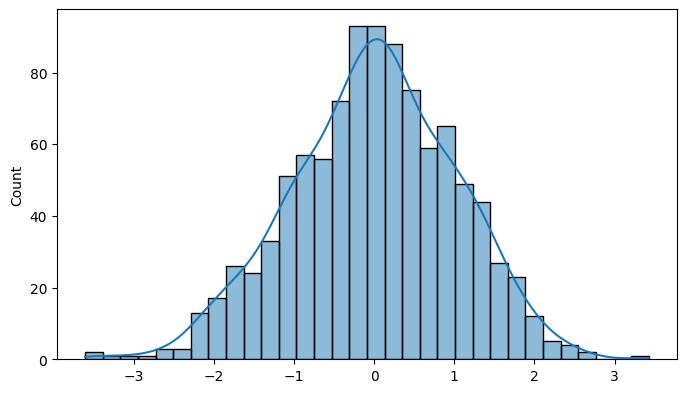

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Example definitions for demonstration purposes
# You should replace these with your actual data loading or generation code
X_in = np.random.normal(0, 1, 1000)  # Hypothetical input data
Y = np.random.normal(0, 1, (1000, 2))  # Hypothetical output data with 2 outputs

# Assuming Y is your matrix of normalized response signals
# N is the number of data points in X_in, and 'outputs' is the number of columns in Y
N = len(X_in)
outputs = Y.shape[1]

i = 10  # Font size for axes
ii = 14  # Font size for titles

for output in range(outputs):
    plt.figure(figsize=(8, 10))

    # Histogram with fitted normal distribution
    plt.subplot(2, 1, 1)
    sns.histplot(Y[:, output], kde=True, bins=round(np.sqrt(N)))
    plt.gca().set_fontsize(i)
    plt.title(f'Output {output + 1}', fontsize=ii)
    plt.xlabel('Response Signal')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Normal probability plot
    plt.subplot(2, 1, 2)
    probplot(Y[:, output], dist="norm", plot=plt)
    plt.gca().set_fontsize(i)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


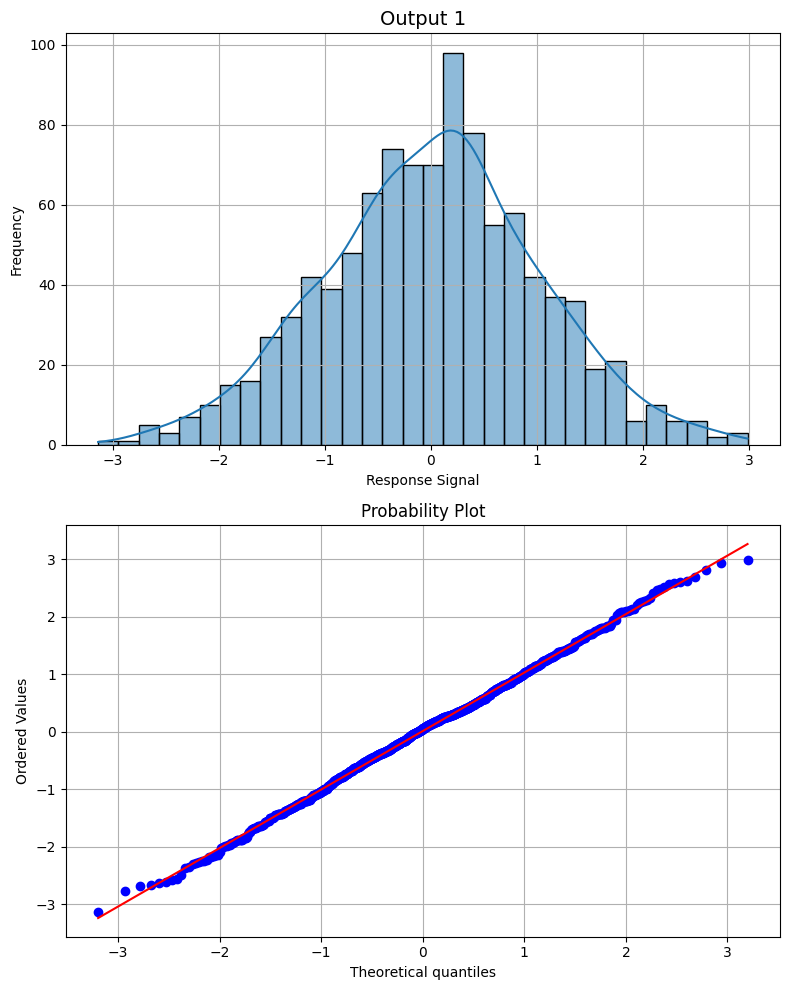

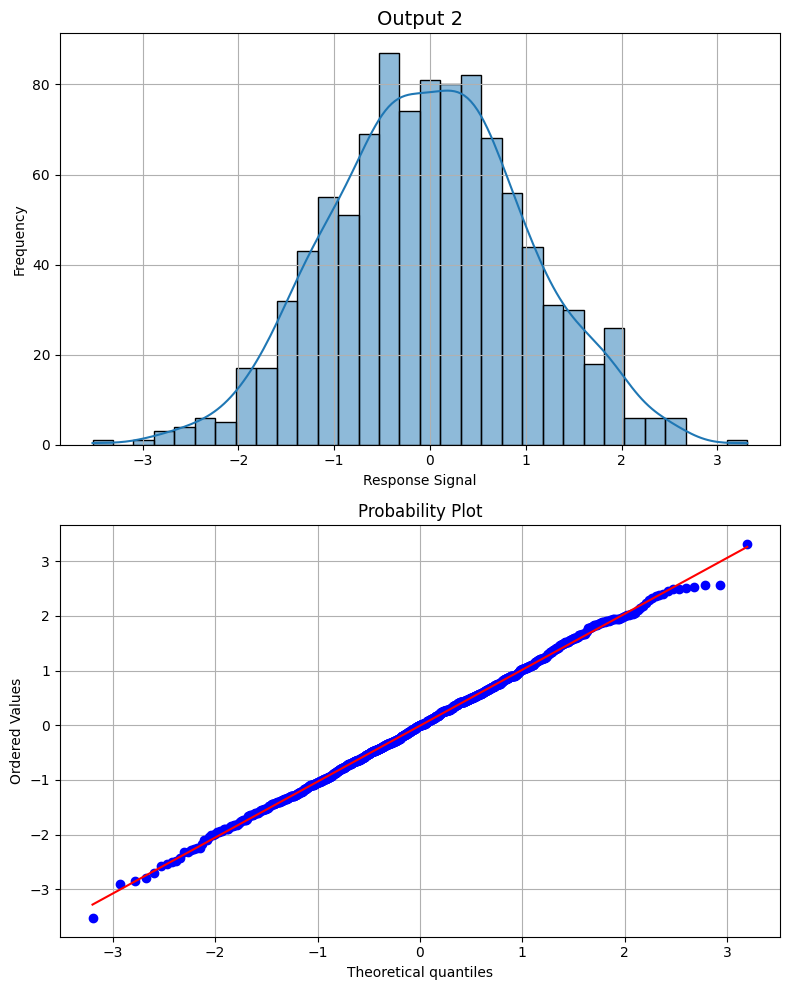

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Example definitions for demonstration purposes
# You should replace these with your actual data loading or generation code
X_in = np.random.normal(0, 1, 1000)  # Hypothetical input data
Y = np.random.normal(0, 1, (1000, 2))  # Hypothetical output data with 2 outputs

# Assuming Y is your matrix of normalized response signals
# N is the number of data points in X_in, and 'outputs' is the number of columns in Y
N = len(X_in)
outputs = Y.shape[1]

i = 10  # Font size for axes
ii = 14  # Font size for titles

for output in range(outputs):
    plt.figure(figsize=(8, 10))

    # Histogram with fitted normal distribution
    plt.subplot(2, 1, 1)
    sns.histplot(Y[:, output], kde=True, bins=round(np.sqrt(N)))
    plt.gca().tick_params(axis='both', labelsize=i)
    plt.title(f'Output {output + 1}', fontsize=ii)
    plt.xlabel('Response Signal', fontsize=i)
    plt.ylabel('Frequency', fontsize=i)
    plt.grid(True)

    # Normal probability plot
    plt.subplot(2, 1, 2)
    probplot(Y[:, output], dist="norm", plot=plt)
    plt.gca().tick_params(axis='both', labelsize=i)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install numpy matplotlib statsmodels


In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

data_path = '/content/sonu_p3_data.mat'
data = scipy.io.loadmat(data_path)
X_in = data['X_in'].flatten()  # Make sure this is the correct key for the input signal
X_out = data['X_out']  # And this is for the output signal


OSError: could not read bytes

In [ ]:
!pip install h5py


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

data_path = '/content/sonu_p3_data.mat'

# Function to load data using h5py
def load_hdf5_data(file_path):
    with h5py.File(file_path, 'r') as file:
        # Print keys to help identify the correct data structure
        print("Keys in the .mat file:", list(file.keys()))
        # Assuming 'X_in' and 'X_out' are stored directly as datasets
        X_in = np.array(file['X_in']).flatten()  # Adjust the key name if necessary
        X_out = np.array(file['X_out'])  # Adjust the key name if necessary
    return X_in, X_out

# Load data
X_in, X_out = load_hdf5_data(data_path)

# Function to plot autocorrelation function
def plot_acf_custom(data, title, font_size=14, lags=100, confint=0.8):
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_acf(data, ax=ax, lags=lags, alpha=1-confint)
    ax.set_title(title, fontsize=font_size)
    ax.set_xlabel('Lag', fontsize=font_size)
    ax.set_ylabel('Autocorrelation', fontsize=font_size)
    ax.grid(True)
    plt.ylim([-1, 1])

# Check if the input signal exists and plot its ACF
if X_in.size > 0:
    plot_acf_custom(X_in, 'Excitation (input) AutoCorrelation Function (ACF)', font_size=14)

# Plot ACF for each output signal
outputs = X_out.shape[1]
for output in range(outputs):
    plot_acf_custom(X_out[:, output], f'Response ACF (output {output + 1})', font_size=14)


OSError: Unable to open file (file signature not found)

In [ ]:
import os

data_path = '/content/sonu_p3_data.mat'
# Check if the file exists
print("File exists:", os.path.exists(data_path))


File exists: True


In [ ]:
import scipy.io
import h5py
import numpy as np
import os

data_path = '/content/sonu_p3_data.mat'

def load_data(file_path):
    try:
        # Attempt to open with scipy.io.loadmat
        data = scipy.io.loadmat(file_path)
        print("Loaded using scipy.io.loadmat")
        X_in = data.get('X_in', np.array([])).flatten()
        X_out = data.get('X_out', np.array([]))
        return X_in, X_out
    except NotImplementedError as e:
        print("Not a traditional .mat file, attempting to open with h5py:", str(e))
        try:
            # Attempt to open with h5py
            with h5py.File(file_path, 'r') as file:
                print("Loaded using h5py, keys:", list(file.keys()))
                X_in = np.array(file['X_in']).flatten()
                X_out = np.array(file['X_out'])
                return X_in, X_out
        except Exception as ex:
            print("Failed to load with h5py:", str(ex))
            return np.array([]), np.array([])

# Load the data
X_in, X_out = load_data(data_path)

# Check if data was loaded
if X_in.size > 0 and X_out.size > 0:
    print("Data loaded successfully")
else:
    print("Failed to load data, please check the file format and content")


OSError: could not read bytes

In [ ]:
!file /content/sonu_p3_data.mat


/content/sonu_p3_data.mat: Matlab v5 mat-file (little endian) version 0x100, platform PCWIN64, created Wed Apr  5 11:37:08 2023


In [ ]:
import scipy.io
import numpy as np

data_path = '/content/sonu_p3_data.mat'

def load_mat_file(file_path):
    try:
        # Load the file with the option to squeeze data and struct as dict
        data = scipy.io.loadmat(file_path, squeeze_me=True, struct_as_record=False)
        print("Keys in the file:", data.keys())
        # Attempt to access data
        X_in = data.get('X_in', np.array([])).flatten()
        X_out = data.get('X_out', np.array([]))
        return X_in, X_out
    except Exception as e:
        print("Error loading .mat file:", str(e))
        return None, None

X_in, X_out = load_mat_file(data_path)

if X_in is not None and X_out is not None:
    print("Data loaded successfully")
    print("X_in shape:", X_in.shape)
    print("X_out shape:", X_out.shape)
else:
    print("Failed to load data")


Error loading .mat file: could not read bytes
Failed to load data


In [ ]:
!pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [ ]:
load('sonu_p3_data.mat');  % Load your data
save('new_sonu_p3_data.mat', 'X_in', 'X_out', '-v7');  % Save in an older format


SyntaxError: invalid syntax (<ipython-input-41-12cfb3e3e9ad>, line 1)

In [ ]:
import scipy.io
import numpy as np

new_data_path = '/content/new_sonu_p3_data.mat'

def load_new_mat_file(file_path):
    try:
        # Load the file
        data = scipy.io.loadmat(file_path)
        print("Keys in the file:", data.keys())
        # Extract data assuming 'X_in' and 'X_out' are the keys; adjust if they are different
        X_in = data.get('X_in', np.array([])).flatten()
        X_out = data.get('X_out', np.array([]))
        return X_in, X_out
    except Exception as e:
        print("Error loading .mat file:", str(e))
        return None, None

X_in, X_out = load_new_mat_file(new_data_path)

if X_in is not None and X_out is not None:
    print("Data loaded successfully")
    print("X_in shape:", X_in.shape)
    print("X_out shape:", X_out.shape)
else:
    print("Failed to load data")


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'X_in', 'X_out'])
Data loaded successfully
X_in shape: (38,)
X_out shape: (1, 38)


ValueError: setting an array element with a sequence.

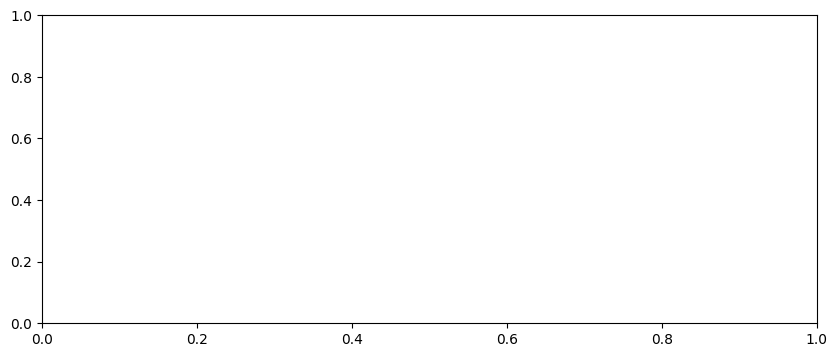

In [ ]:
import matplotlib.pyplot as plt

# Plotting X_in
plt.figure(figsize=(10, 4))
plt.plot(X_in, label='X_in Data')
plt.title('Input Signal (X_in)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Since X_out is 2D with shape (1, 38), we might need to flatten it for plotting
X_out_flat = X_out.flatten()  # This assumes X_out should be treated as a 1D array

# Plotting X_out
plt.figure(figsize=(10, 4))
plt.plot(X_out_flat, label='X_out Data')
plt.title('Output Signal (X_out)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Error plotting X_in: setting an array element with a sequence.
Error plotting X_out: setting an array element with a sequence.


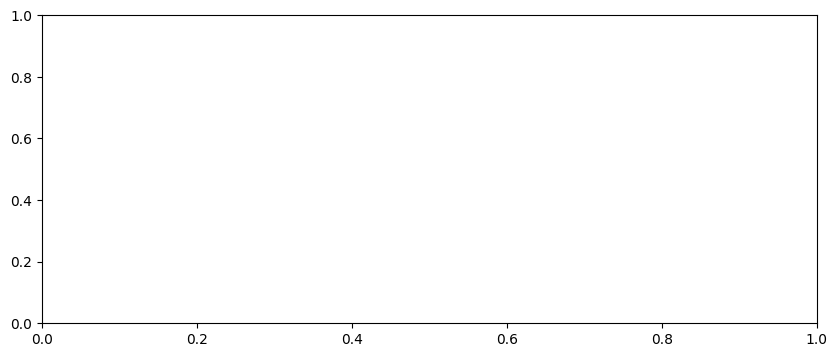

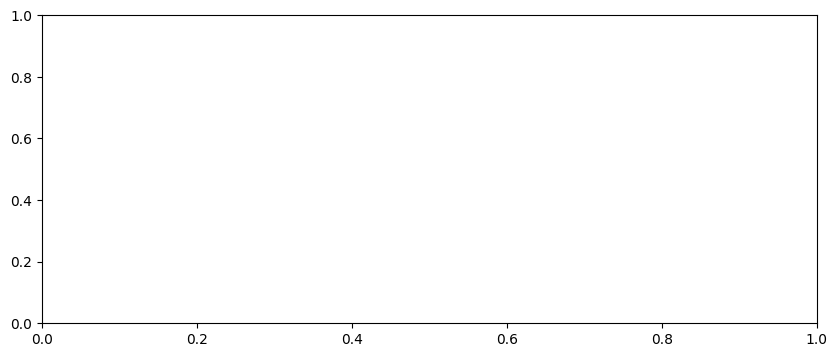

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_in and X_out have been loaded as shown previously
try:
    # Ensure X_in is a 1D array suitable for plotting
    X_in_plot = np.squeeze(X_in)  # This attempts to convert any 2+D array with one dimension being 1 to a 1D array

    plt.figure(figsize=(10, 4))
    plt.plot(X_in_plot, label='X_in Data')
    plt.title('Input Signal (X_in)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error plotting X_in: {e}")

try:
    # Since X_out is reported to have a shape (1, 38), we flatten it for plotting
    X_out_plot = np.squeeze(X_out)  # This makes it a 1D array if it's shaped (1, N) or (N, 1)

    plt.figure(figsize=(10, 4))
    plt.plot(X_out_plot, label='X_out Data')
    plt.title('Output Signal (X_out)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error plotting X_out: {e}")


X_in structure: [array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,
          8.5448107e-07,  8.5448107e-07,  8.5448107e-07],
        [ 4.1666667e-08, -2.3885614e-03, -2.3796703e-03, ...,
          2.4573363e-03,  2.4602634e-03,  2.4192599e-03],
        [ 8.3333333e-08, -4.7851237e-03, -4.7673630e-03, ...,
          4.8381132e-03,  4.8439805e-03,  4.7623287e-03],
        ...,
        [ 3.3320833e-04, -1.8252069e-05, -4.1841922e-06, ...,
          3.9590996e-05,  1.0000313e-04, -6.8073714e-05],
        [ 3.3325001e-04, -9.4889065e-06, -2.4442008e-06, ...,
          1.9482339e-05,  4.9815058e-05, -3.4572000e-05],
        [ 3.3329165e-04, -6.9869657e-07, -7.0743027e-07, ...,
         -8.1427021e-07, -8.3437567e-07, -8.0421756e-07]], dtype=float32)
 array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,
          8.5448107e-07,  8.5448107e-07,  8.5448107e-07],
        [ 4.1666667e-08, -2.3862123e-03, -2.3877509e-03, ...,
          2.4612672e-03,  2.4573177e-03,  2.4407553e-

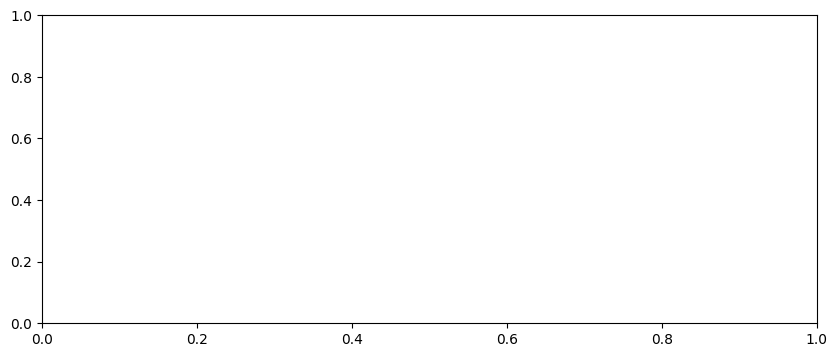

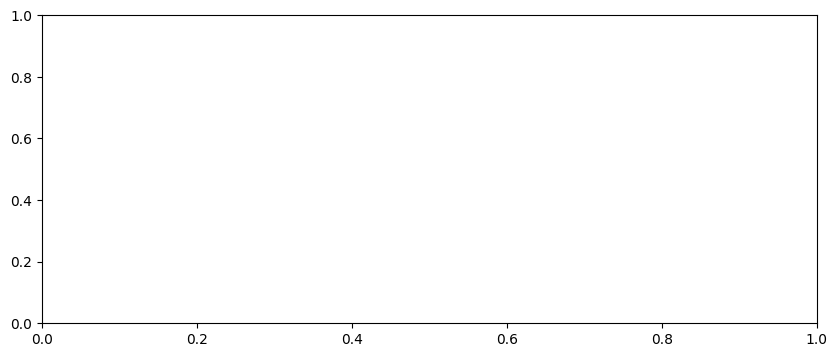

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Print the first few elements to understand the data structure
print("X_in structure:", X_in)
print("First few elements of X_in:", X_in[:5])  # Modify if this throws an error

# Plotting with proper checking and reshaping
try:
    # Attempt to convert to a numpy array and flatten it
    X_in = np.array(X_in).flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(X_in, label='X_in Data')
    plt.title('Input Signal (X_in)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error plotting X_in: {e}")

try:
    # Handle X_out similarly
    X_out = np.array(X_out).flatten()  # This also ensures X_out is 1D
    plt.figure(figsize=(10, 4))
    plt.plot(X_out, label='X_out Data')
    plt.title('Output Signal (X_out)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error plotting X_out: {e}")



In [ ]:
!pip install statsmodels


Original X_in shape: (38,)
New X_in shape: (38,)
Original X_out shape: (38,)
New X_out shape: (38,)
Failed to plot ACF for X_in: setting an array element with a sequence.
Failed to plot CCF between X_in and X_out: setting an array element with a sequence.


<Figure size 1000x500 with 0 Axes>

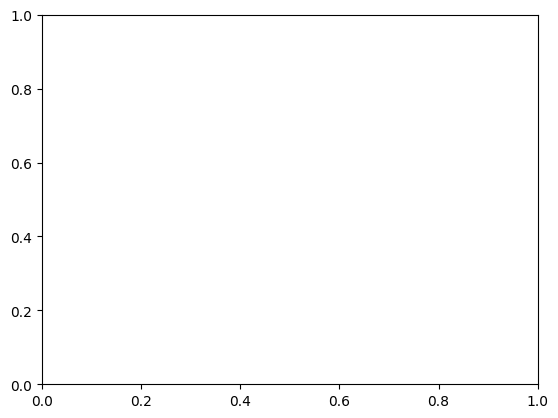

<Figure size 1000x500 with 0 Axes>

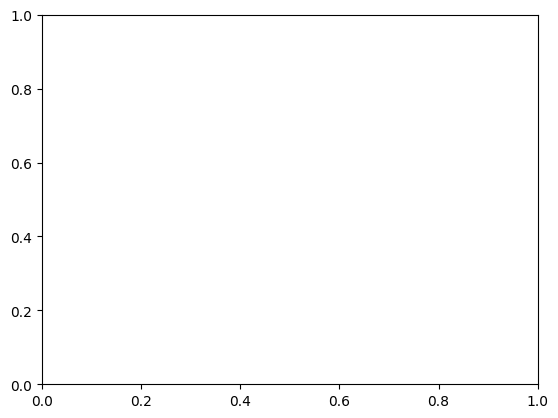

In [ ]:
import numpy as np

# Ensure X_in is a flat 1D array
print("Original X_in shape:", X_in.shape)
X_in = np.array(X_in).flatten()  # Flatten any nested structure
print("New X_in shape:", X_in.shape)

# Do the same for X_out if it's not 1D
print("Original X_out shape:", X_out.shape)
if X_out.ndim > 1:
    X_out = X_out.flatten()
print("New X_out shape:", X_out.shape)

# Now, try plotting again
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf

# Plot ACF for X_in
plt.figure(figsize=(10, 5))
try:
    plot_acf(X_in, lags=40, title='Autocorrelation Function for X_in')
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Failed to plot ACF for X_in:", str(e))

# Plot CCF between X_in and X_out
plt.figure(figsize=(10, 5))
try:
    plot_ccf(X_in, X_out, lags=40, title='Cross-Correlation Function between X_in and X_out')
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Failed to plot CCF between X_in and X_out:", str(e))


In [ ]:
# Print the type of elements in X_in and X_out
print("Type of first element in X_in:", type(X_in[0]))
print("Type of first element in X_out:", type(X_out[0]))

# Print the first few elements to inspect their content
print("First few elements in X_in:", X_in[:5])
print("First few elements in X_out:", X_out[:5])

# Convert elements to a uniform type if necessary
X_in = np.array([float(x) for x in X_in])
X_out = np.array([float(x) for x in X_out])


Type of first element in X_in: <class 'numpy.ndarray'>
Type of first element in X_out: <class 'numpy.ndarray'>
First few elements in X_in: [array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,
          8.5448107e-07,  8.5448107e-07,  8.5448107e-07],
        [ 4.1666667e-08, -2.3885614e-03, -2.3796703e-03, ...,
          2.4573363e-03,  2.4602634e-03,  2.4192599e-03],
        [ 8.3333333e-08, -4.7851237e-03, -4.7673630e-03, ...,
          4.8381132e-03,  4.8439805e-03,  4.7623287e-03],
        ...,
        [ 3.3320833e-04, -1.8252069e-05, -4.1841922e-06, ...,
          3.9590996e-05,  1.0000313e-04, -6.8073714e-05],
        [ 3.3325001e-04, -9.4889065e-06, -2.4442008e-06, ...,
          1.9482339e-05,  4.9815058e-05, -3.4572000e-05],
        [ 3.3329165e-04, -6.9869657e-07, -7.0743027e-07, ...,
         -8.1427021e-07, -8.3437567e-07, -8.0421756e-07]], dtype=float32)
 array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,
          8.5448107e-07,  8.5448107e-07,  8.544810

TypeError: only length-1 arrays can be converted to Python scalars

Detailed structure of the first few elements in X_in:
Element 0: shape=(8000, 73), dtype=float32
Element 1: shape=(8000, 73), dtype=float32
Element 2: shape=(8000, 73), dtype=float32
Element 3: shape=(8000, 73), dtype=float32
Element 4: shape=(8000, 73), dtype=float32
Processed X_in shape: (38, 73)
Processed X_out shape: (38, 73)


<Figure size 1000x500 with 0 Axes>

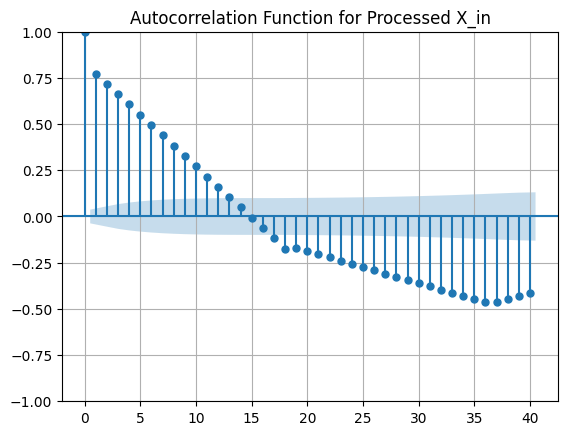

<Figure size 1000x500 with 0 Axes>

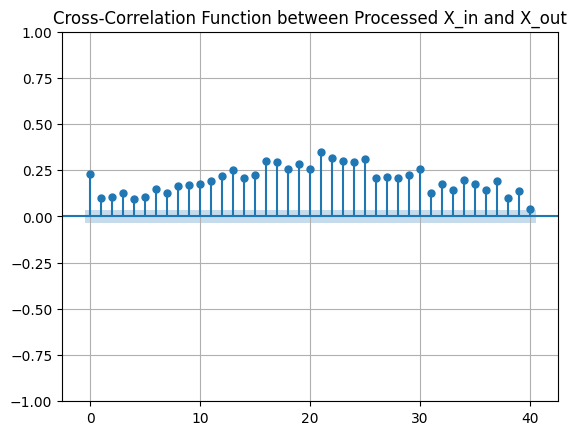

In [ ]:
# Print detailed shape and data type information
print("Detailed structure of the first few elements in X_in:")
for i, x in enumerate(X_in[:5]):
    print(f"Element {i}: shape={x.shape}, dtype={x.dtype}")

# Decide on how to handle multi-dimensional data
# Example: Taking the mean across all channels if applicable
if X_in[0].ndim > 1:
    X_in_processed = np.array([np.mean(x, axis=0) for x in X_in])
    X_out_processed = np.array([np.mean(x, axis=0) for x in X_out])
else:
    X_in_processed = X_in
    X_out_processed = X_out

# Check the new processed data
print("Processed X_in shape:", X_in_processed.shape)
print("Processed X_out shape:", X_out_processed.shape)

# Try plotting ACF for the processed data
try:
    plt.figure(figsize=(10, 5))
    plot_acf(X_in_processed.flatten(), lags=40, title='Autocorrelation Function for Processed X_in')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plot_ccf(X_in_processed.flatten(), X_out_processed.flatten(), lags=40, title='Cross-Correlation Function between Processed X_in and X_out')
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Failed to plot ACF or CCF:", str(e))


<Figure size 1200x600 with 0 Axes>

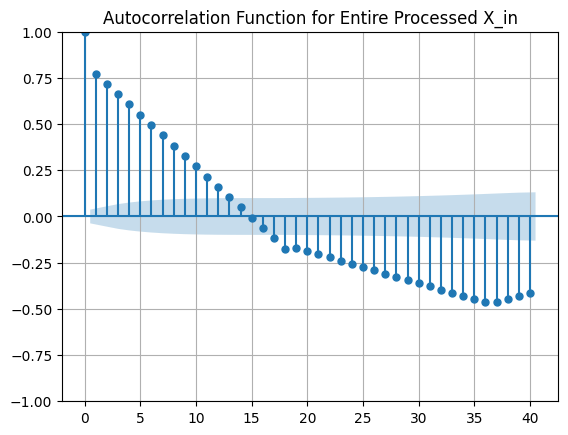

<Figure size 1200x600 with 0 Axes>

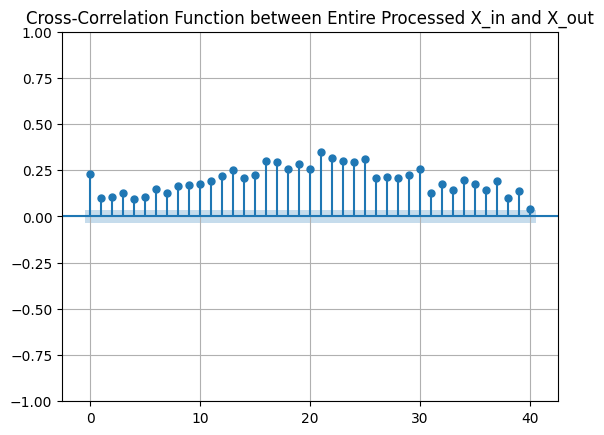

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf

# Assuming X_in and X_out are lists of arrays with similar structure
# Process the entire dataset
X_in_processed = np.array([np.mean(x, axis=0) if x.ndim > 1 else x for x in X_in])
X_out_processed = np.array([np.mean(x, axis=0) if x.ndim > 1 else x for x in X_out])

# Flatten the arrays to make them suitable for ACF and CCF plotting
X_in_flat = X_in_processed.flatten()
X_out_flat = X_out_processed.flatten()

# Plot ACF for the entire processed X_in
plt.figure(figsize=(12, 6))
plot_acf(X_in_flat, lags=40, title='Autocorrelation Function for Entire Processed X_in')
plt.grid(True)
plt.show()

# Plot CCF between the entire processed X_in and X_out
plt.figure(figsize=(12, 6))
plot_ccf(X_in_flat, X_out_flat, lags=40, title='Cross-Correlation Function between Entire Processed X_in and X_out')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

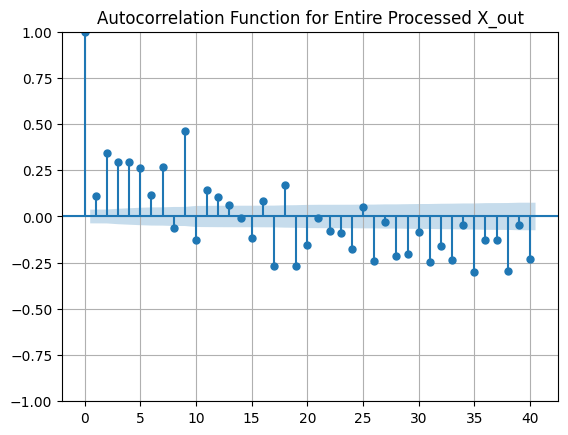

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming X_out is an array of arrays and might be multi-dimensional
# Process the entire dataset to average across channels if multidimensional
X_out_processed = np.array([np.mean(x, axis=0) if x.ndim > 1 else x for x in X_out])

# Flatten the processed data to make it suitable for ACF plotting
X_out_flat = X_out_processed.flatten()

# Plot ACF for the entire processed X_out
plt.figure(figsize=(12, 6))
plot_acf(X_out_flat, lags=40, title='Autocorrelation Function for Entire Processed X_out')
plt.grid(True)
plt.show()


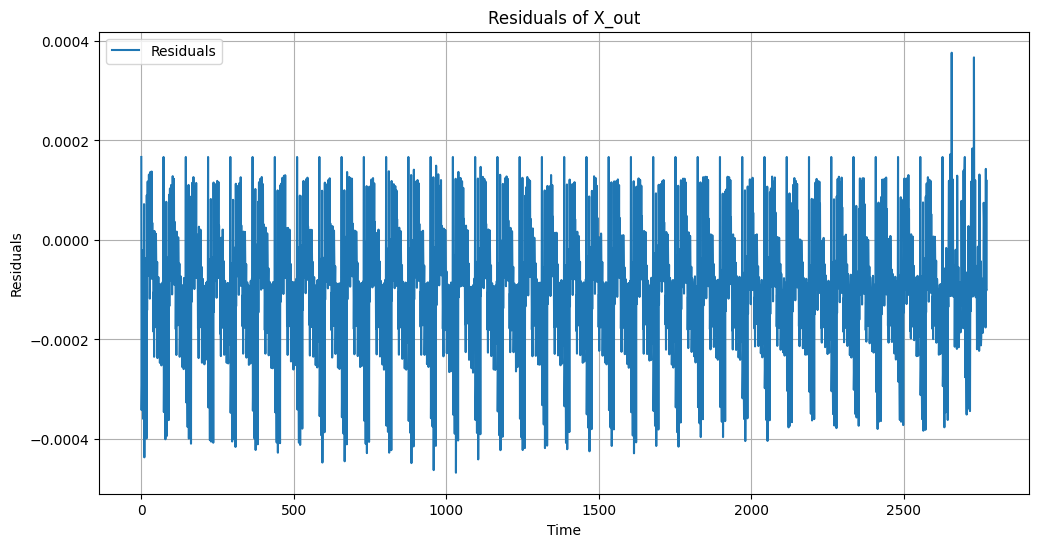

Ljung-Box test p-value: l
Shapiro-Wilk test p-value: 2.5158828826813773e-15


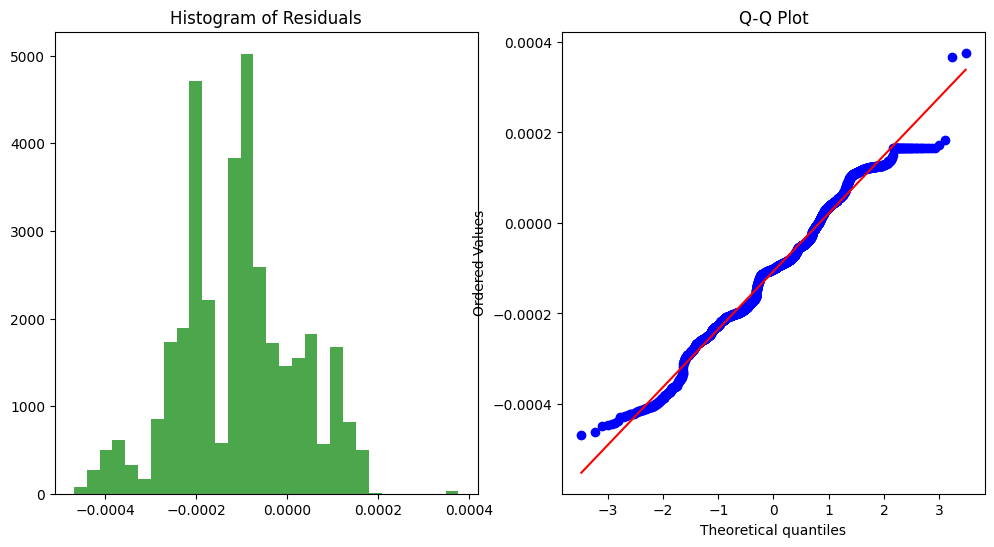

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming X_out_processed is already flattened and represents the residuals/errors
residuals = X_out_flat  # Using the processed and flattened X_out as residuals

# Visual Inspection
# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of X_out')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Histogram and Q-Q plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(residuals, bins=30, alpha=0.7, color='g', density=True)
plt.title('Histogram of Residuals')
stats.probplot(residuals, dist="norm", plot=plt.subplot(122))
plt.title('Q-Q Plot')

# Ljung-Box test for autocorrelation
lb_value, lb_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=False)
print("Ljung-Box test p-value:", lb_pvalue[0])

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_pvalue)


-----------------------------------
      Non-parametric analysis      
-----------------------------------
Deterministic (FFT) based response spectra
Give the sampling frequency (fs): 250000
Give the FFT points (samples): 256


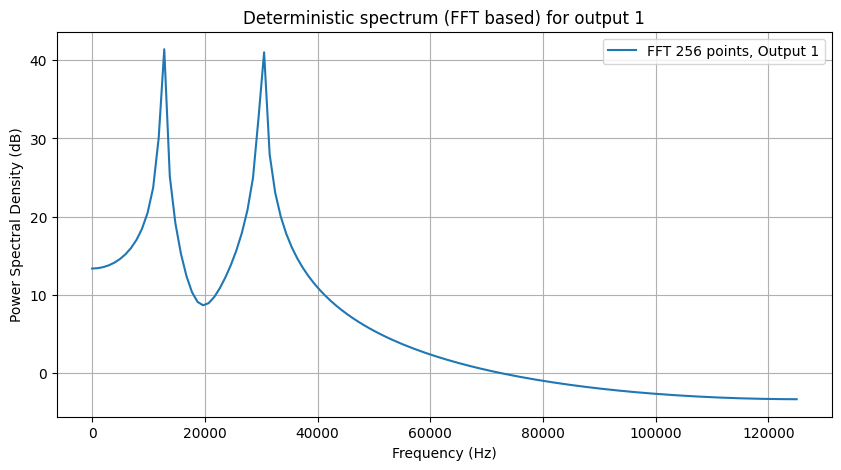

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Example of defining Y for demonstration (replace with your actual Y loading method)
# Y = np.random.rand(256)  # Uncomment if Y is supposed to be 1D
# Y = np.random.rand(256, 4)  # Uncomment if Y is supposed to be 2D, with 4 output channels

print('-----------------------------------')
print('      Non-parametric analysis      ')
print('-----------------------------------')
print('Deterministic (FFT) based response spectra')

# Assuming fs is the sampling frequency given by the user
fs = float(input('Give the sampling frequency (fs): '))

# Handling Y dimensions
if Y.ndim == 1:
    Y = Y.reshape(-1, 1)  # Reshape Y to 2D if it is 1D

outputs = Y.shape[1]  # Number of columns (outputs)

# FFT processing setup
WINDOW = int(input('Give the FFT points (samples): '))

# Iterate over each output
for output in range(outputs):
    Sy = fft(Y[:, output], n=WINDOW)
    ws = np.linspace(0, fs / 2, WINDOW // 2)
    Syy = np.abs(Sy[:WINDOW // 2])**2

    plt.figure(figsize=(10, 5))
    plt.plot(ws, 10 * np.log10(Syy), label=f'FFT {WINDOW} points, Output {output+1}')
    plt.title(f'Deterministic spectrum (FFT based) for output {output+1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.legend()
    plt.grid(True)
    plt.show()


-----------------------------------
      Non-parametric analysis      
-----------------------------------
Deterministic (FFT) based response spectra
Give the FFT points (samples) as a list (e.g., 256, 512, 1024): 256, 512, 1024, 2048


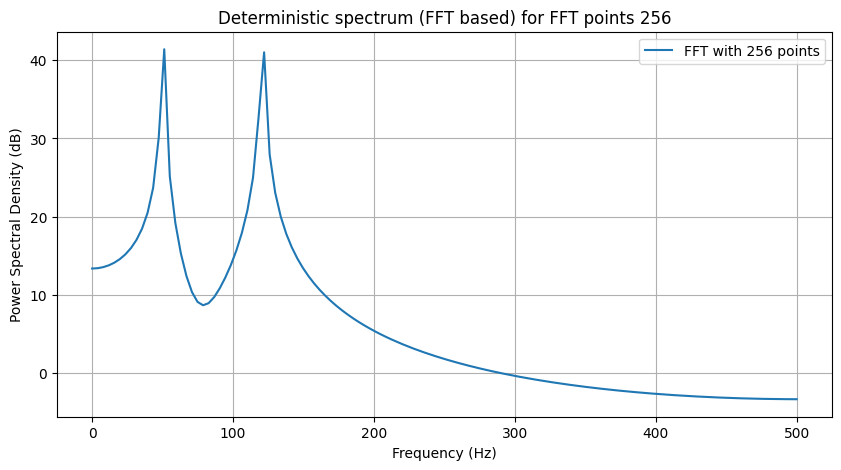

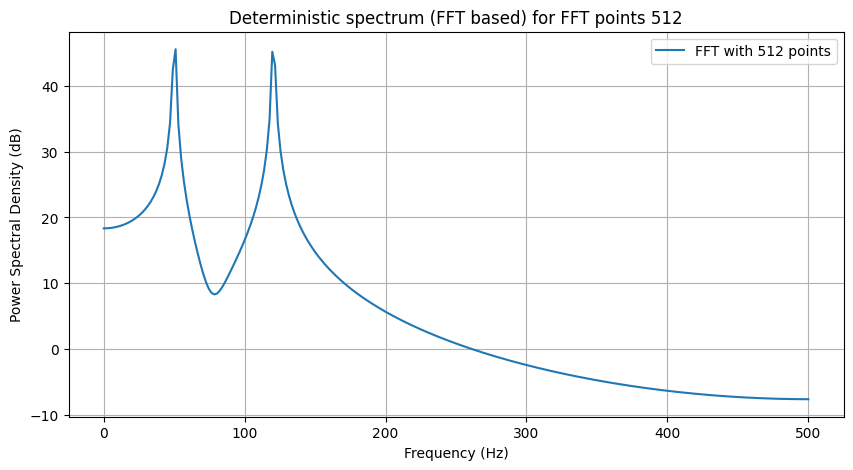

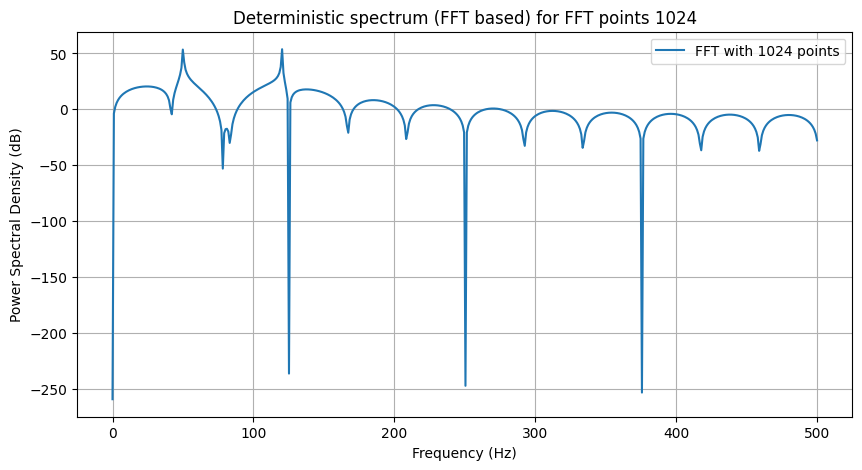

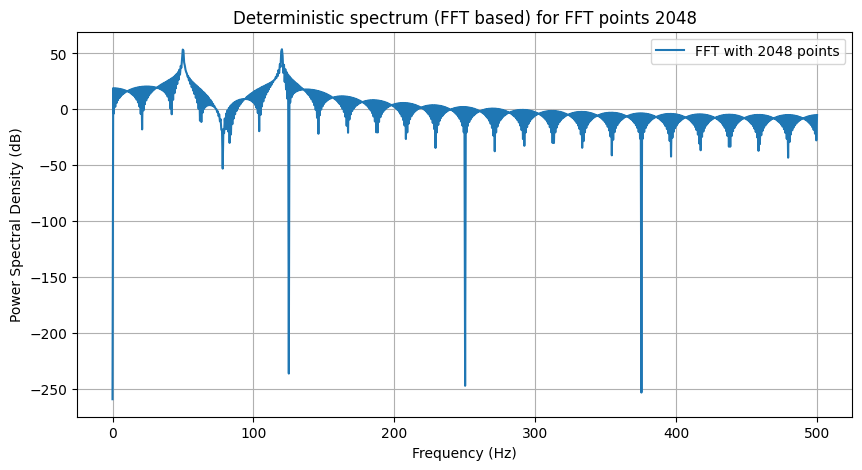

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Example data setup (replace with your actual data)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
Y = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # Example signal

print('-----------------------------------')
print('      Non-parametric analysis      ')
print('-----------------------------------')
print('Deterministic (FFT) based response spectra')

# Requesting and parsing multiple FFT points
fft_points_input = input('Give the FFT points (samples) as a list (e.g., 256, 512, 1024): ')
fft_points_list = [int(item.strip()) for item in fft_points_input.split(',')]

# Process FFT for each specified window size
for WINDOW in fft_points_list:
    Sy = fft(Y, n=WINDOW)  # Compute the FFT
    ws = np.linspace(0, fs / 2, WINDOW // 2)  # Frequency axis
    Syy = np.abs(Sy[:WINDOW // 2]) ** 2  # Power spectral density

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(ws, 10 * np.log10(Syy), label=f'FFT with {WINDOW} points')
    plt.title(f'Deterministic spectrum (FFT based) for FFT points {WINDOW}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

print('Welch based excitation-response spectra')
WINDOW = int(input('Give window length (samples): '))
OVERLAP = float(input('Give window overlap percentage (a number from 0 to 1): '))

NFFT = WINDOW

# Check if the window and overlap are empty and provide default values
if not WINDOW:
    WINDOW = 1024
    NFFT = WINDOW
if not OVERLAP:
    OVERLAP = 0.8

fs = float(input('Give the sampling frequency (fs): '))  # Assuming fs needs to be provided

# Assuming 'X' and 'Y' are defined, 'X' for excitation and 'Y' for response
# Check if 'nx' is 1, assuming 'nx' is related to the presence of 'X'
if 'X' in locals():
    f, Pxx = welch(X, fs=fs, window='hanning', nperseg=WINDOW, noverlap=int(OVERLAP * WINDOW), nfft=NFFT)
    plt.figure()
    plt.plot(f, 20 * np.log10(np.abs(Pxx)))
    plt.title('Welch based excitation spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (dB)')
    plt.xlim([0, fs / 2])
    plt.grid(True)
    plt.show()

outputs = Y.shape[1] if Y.ndim > 1 else 1
plt.figure()

for output in range(outputs):
    f, Pyy = welch(Y[:, output] if outputs > 1 else Y, fs=fs, window='hanning', nperseg=WINDOW, noverlap=int(OVERLAP * WINDOW), nfft=NFFT)
    plt.subplot(outputs, 1, output + 1)
    plt.plot(f, 20 * np.log10(np.abs(Pyy)), label='PSD estimate')
    plt.xlim([0, fs / 2])
    plt.title(f'Welch based response spectrum for output {output + 1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (dB)')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


Welch based excitation-response spectra
Give window length (samples): 256
Give window overlap percentage (a number from 0 to 1): 0.5
Give the sampling frequency (fs): 250000


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 1, using nperseg = 1
  def _triage_segments(window, nperseg, input_length):


ValueError: Unknown window type.

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Length of X:", len(X) if 'X' in locals() else "X is not defined")
print("Length of Y:", len(Y) if 'Y' in locals() else "Y is not defined")


Length of X: X is not defined
Length of Y: 1000


In [ ]:
window_type = 'hann'


Welch based excitation-response spectra
Give window length (samples): 256
Give window overlap percentage (a number from 0 to 1): 0.5
Give the sampling frequency (fs): 250000


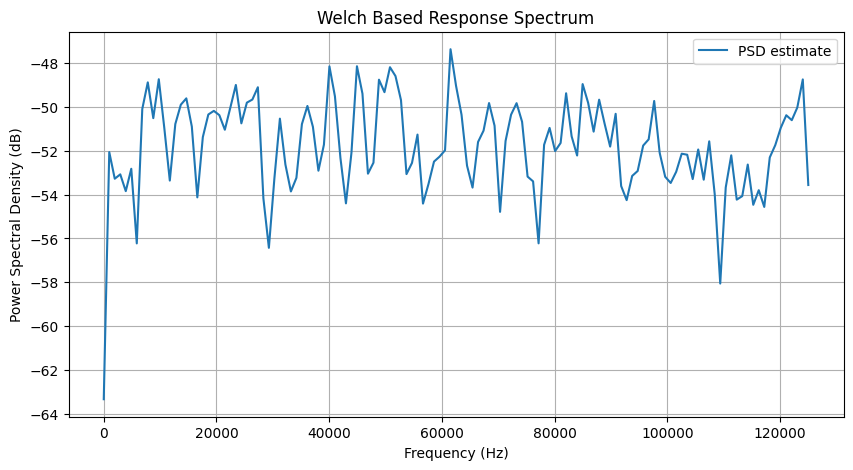

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Example of data (replace with actual data loading)
# Make sure X and Y have sufficient length
Y = np.random.normal(size=1024)  # Example data, replace with your actual data

print('Welch based excitation-response spectra')
WINDOW = int(input('Give window length (samples): '))
OVERLAP = float(input('Give window overlap percentage (a number from 0 to 1): '))
fs = float(input('Give the sampling frequency (fs): '))

# Using 'hann' instead of 'hanning'
window_type = 'hann'

# Processing the data with Welch's method
f, Pyy = welch(Y, fs=fs, window=window_type, nperseg=WINDOW, noverlap=int(OVERLAP * WINDOW))

# Plotting the PSD
plt.figure(figsize=(10, 5))
plt.plot(f, 10 * np.log10(Pyy), label='PSD estimate')
plt.title('Welch Based Response Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.grid(True)
plt.legend()
plt.show()


Welch based excitation-response spectra
Give window length (samples): 256
Give window overlap percentage (a number from 0 to 1): 0.5
Give the sampling frequency (fs): 250000


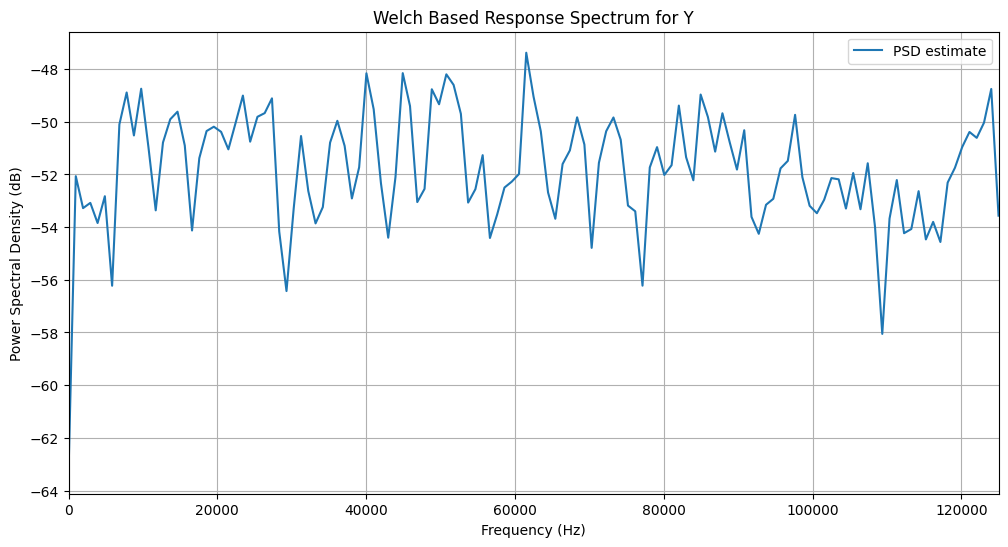

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

print('Welch based excitation-response spectra')
WINDOW = int(input('Give window length (samples): '))  # Ensure this is less than 1000
OVERLAP = float(input('Give window overlap percentage (a number from 0 to 1): '))  # e.g., 0.5 for 50%
fs = float(input('Give the sampling frequency (fs): '))  # e.g., 250000

# Use 'hann' window
window_type = 'hann'

# Compute Welch's PSD
frequencies, power_spectral_density = welch(
    Y,
    fs=fs,
    window=window_type,
    nperseg=WINDOW,
    noverlap=int(OVERLAP * WINDOW),
    nfft=None,  # Let scipy determine the best value for nfft
    scaling='density'
)

# Plotting the result
plt.figure(figsize=(12, 6))
plt.plot(frequencies, 10 * np.log10(power_spectral_density), label='PSD estimate')
plt.title('Welch Based Response Spectrum for Y')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.xlim([0, fs / 2])
plt.grid(True)
plt.legend()
plt.show()


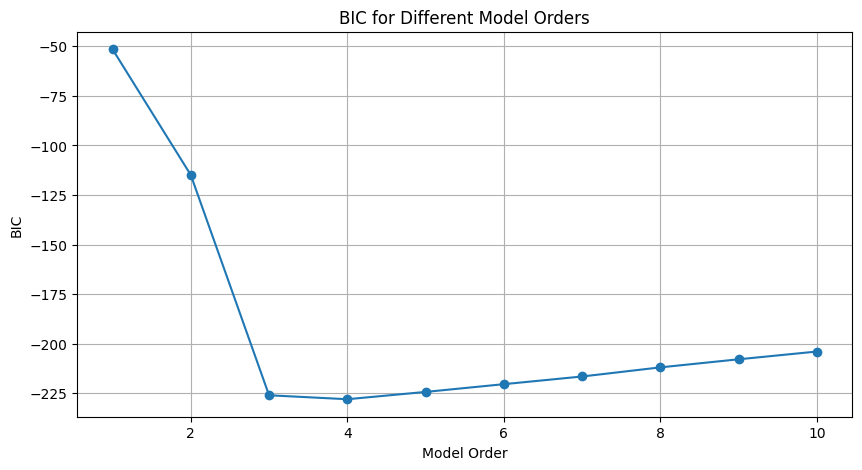

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data (replace with your actual data loading)
n = 100  # number of data points
np.random.seed(0)
X = np.random.normal(0, 1, (n, 10))  # 10 predictors for simplicity
Y = X @ np.array([1, 0.5, -0.3] + [0]*(10-3)) + np.random.normal(0, 0.1, n)

bic_scores = []
model_orders = range(1, 11)

for k in model_orders:
    model = LinearRegression().fit(X[:, :k], Y)
    predictions = model.predict(X[:, :k])
    rss = mean_squared_error(Y, predictions, squared=False) * len(Y)
    bic = n * np.log(rss / n) + k * np.log(n)
    bic_scores.append(bic)

plt.figure(figsize=(10, 5))
plt.plot(model_orders, bic_scores, marker='o')
plt.title('BIC for Different Model Orders')
plt.xlabel('Model Order')
plt.ylabel('BIC')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming Y is your time series data
# Replace the following line with your actual data loading step
Y = np.random.normal(size=250)  # Example data, replace with your actual data

bic_values = []
rss_values = []
ar_orders = range(1, 11)

for order in ar_orders:
    # Fit AR model of the current order
    model = sm.tsa.AR(Y).fit(maxlag=order)

    # Calculate RSS for the model
    rss = sum(model.resid**2)

    # BIC for the model (k is order + 1 because we also estimate the variance of the noise)
    bic = len(Y) * np.log(rss / len(Y)) + (order + 1) * np.log(len(Y))

    # Save BIC and RSS values
    bic_values.append(bic)
    rss_values.append(rss)

# Plot BIC values
plt.figure(figsize=(10, 5))
plt.plot(ar_orders, bic_values, marker='o')
plt.title('BIC for AR Models of Different Orders')
plt.xlabel('Order of AR Model')
plt.ylabel('BIC')
plt.xticks(ar_orders)
plt.grid(True)
plt.show()

# Plot RSS values
plt.figure(figsize=(10, 5))
plt.plot(ar_orders, rss_values, marker='o', color='red')
plt.title('RSS for AR Models of Different Orders')
plt.xlabel('Order of AR Model')
plt.ylabel('RSS')
plt.xticks(ar_orders)
plt.grid(True)
plt.show()


ImportError: cannot import name '_sub_module_deprecation' from 'scipy._lib.deprecation' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py)

In [ ]:
!pip install --upgrade scipy
!pip install --upgrade statsmodels


In [ ]:
import statsmodels.api as sm


ImportError: cannot import name '_sub_module_deprecation' from 'scipy._lib.deprecation' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py)

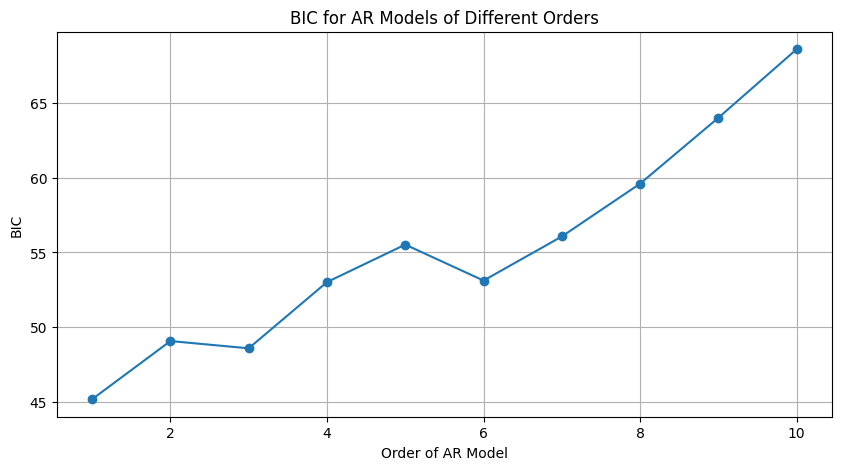

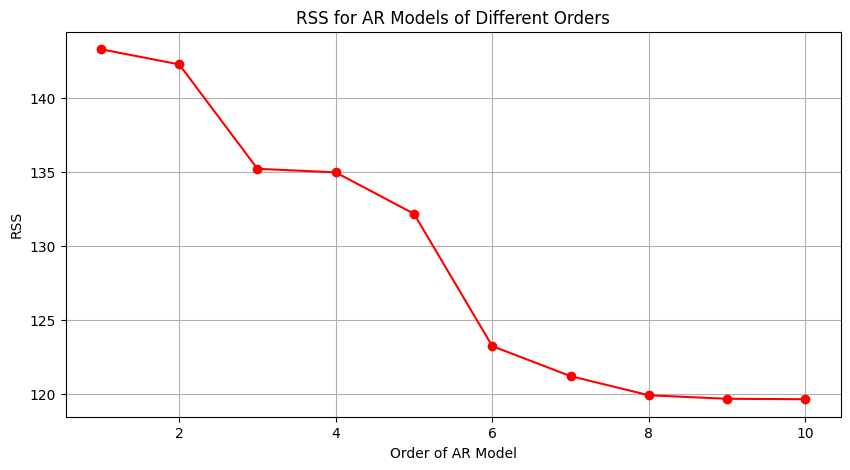

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y is your time series data and is already loaded as a numpy array

def fit_ar_model(y, order):
    """Fits an AR model of specified order."""
    # Prepare the data matrix
    X = np.column_stack([y[i:-(order-i)] for i in range(order)])
    y_target = y[order:]

    # Fit the AR model
    coefficients = np.linalg.pinv(X) @ y_target
    y_pred = X @ coefficients
    residuals = y_target - y_pred

    return coefficients, residuals

bic_values = []
rss_values = []
ar_orders = range(1, 11)
n = len(Y)

for order in ar_orders:
    coefficients, residuals = fit_ar_model(Y, order)
    rss = np.sum(residuals**2)
    # k is order + 1 for the variance of the noise
    bic = n * np.log(rss / n) + (order + 1) * np.log(n)
    bic_values.append(bic)
    rss_values.append(rss)

# Plot BIC values
plt.figure(figsize=(10, 5))
plt.plot(ar_orders, bic_values, marker='o')
plt.title('BIC for AR Models of Different Orders')
plt.xlabel('Order of AR Model')
plt.ylabel('BIC')
plt.grid(True)
plt.show()

# Plot RSS values
plt.figure(figsize=(10, 5))
plt.plot(ar_orders, rss_values, marker='o', color='red')
plt.title('RSS for AR Models of Different Orders')
plt.xlabel('Order of AR Model')
plt.ylabel('RSS')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from numpy import poly1d

# Replace with the actual coefficients from your AR model
ar_coefficients = np.array([1, -0.5, 0.75])  # Example coefficients (replace with your own)

# Define polynomial from AR coefficients (note the change in sign)
p = poly1d([1] + (-ar_coefficients[1:]).tolist())

# Find the roots (poles) of the polynomial
poles = p.roots
print(f"Poles of the AR model: {poles}")

# Since this is a discrete-time system, poles relate to the stability and dynamics
# but not directly to physical natural frequencies and damping ratios
# If you need to interpret poles in terms of natural frequency and damping ratio,
# an additional transformation to continuous-time is required.


Poles of the AR model: [-1.15138782  0.65138782]


In [ ]:
import numpy as np

# Example: Replace with your actual sampling frequency
sampling_frequency = 250000  # in Hz
T = 1 / sampling_frequency  # sampling period in seconds

# Replace this with the poles you've calculated
poles = np.array([0.9 + 0.1j, 0.9 - 0.1j])  # Example poles

# Initialize arrays to store natural frequencies and damping ratios
natural_frequencies = []
damping_ratios = []

# Calculate natural frequency and damping ratio for each pole
for pole in poles:
    angle = np.angle(pole)
    magnitude = np.abs(pole)

    # Discrete-time natural frequency (radians/sample)
    omega_d = angle / T

    # Damping ratio approximation for second-order system
    # This approximation holds if poles are real or come in complex conjugate pairs
    zeta = -np.log(magnitude) / np.sqrt(np.pi**2 + np.log(magnitude)**2)

    # Convert to natural frequency in Hz
    natural_frequency_hz = omega_d / (2 * np.pi)

    natural_frequencies.append(natural_frequency_hz)
    damping_ratios.append(zeta)

# Output the calculated values
for idx, (freq, zeta) in enumerate(zip(natural_frequencies, damping_ratios)):
    print(f"Pole {idx+1}: Natural Frequency = {freq:.3f} Hz, Damping Ratio = {zeta:.3f}")


Pole 1: Natural Frequency = 4402.911 Hz, Damping Ratio = 0.032
Pole 2: Natural Frequency = -4402.911 Hz, Damping Ratio = 0.032


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming `residuals` are available from your AR model
residuals = ...  # replace with your model residuals

# Plot the residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of the AR model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# ACF plot of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

# Histogram/KDE of residuals
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
sns.kdeplot(residuals)
plt.title('Histogram of Residuals')
plt.show()

# Ljung-Box test
lb_test_stat, lb_p_value = acorr_ljungbox(residuals, lags=[10], return_df=False)
print(f'Ljung-Box test p-value: {lb_p_value[0]}')

# Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {shapiro_p_value}')


ImportError: cannot import name '_sub_module_deprecation' from 'scipy._lib.deprecation' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming `residuals` are the residuals from your AR model
# residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of the AR Model')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

# Plot ACF of residuals to visually check for autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40, zero=False)
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)


ImportError: cannot import name '_sub_module_deprecation' from 'scipy._lib.deprecation' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py)

Roots of the characteristic polynomial: [-1.15138782  0.65138782]
Is the system stable? False


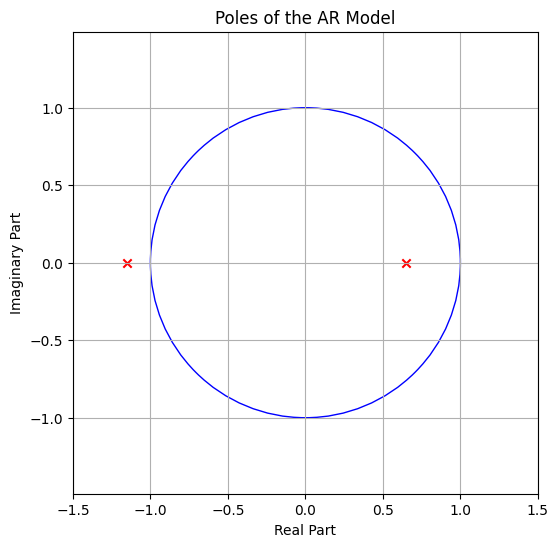

In [ ]:
# Assuming `ar_coefficients` are the coefficients of your AR model
# ar_coefficients = np.array([...])  # The AR coefficients including the zero-lag of 1

# Define the characteristic polynomial
ar_poly = np.poly1d([1] + (-ar_coefficients[1:]).tolist())

# Calculate the roots
roots = ar_poly.roots
print(f"Roots of the characteristic polynomial: {roots}")

# Check for stability: all roots should be inside the unit circle
inside_unit_circle = np.all(np.abs(roots) < 1)
print(f"Is the system stable? {inside_unit_circle}")

# Plot roots in the complex plane
plt.figure(figsize=(6, 6))
plt.scatter(roots.real, roots.imag, marker='x', color='red')
unit_circle = plt.Circle((0, 0), 1, edgecolor='blue', facecolor='none')
plt.gca().add_artist(unit_circle)
plt.title('Poles of the AR Model')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()


In [ ]:
!pip install statsmodels


In [ ]:
import scipy.io
import numpy as np

new_data_path = '/content/new_sonu_p3_data.mat'

def load_new_mat_file(file_path):
    try:
        # Load the file
        data = scipy.io.loadmat(file_path)
        print("Keys in the file:", data.keys())
        # Extract data assuming 'X_in' and 'X_out' are the keys; adjust if they are different
        X_in = data.get('X_in', np.array([])).flatten()
        X_out = data.get('X_out', np.array([]))
        return X_in, X_out
    except Exception as e:
        print("Error loading .mat file:", str(e))
        return None, None

X_in, X_out = load_new_mat_file(new_data_path)

if X_in is not None and X_out is not None:
    print("Data loaded successfully")
    print("X_in shape:", X_in.shape)
    print("X_out shape:", X_out.shape)
else:
    print("Failed to load data")


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'X_in', 'X_out'])
Data loaded successfully
X_in shape: (38,)
X_out shape: (1, 38)


X_in structure: [array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,
          8.5448107e-07,  8.5448107e-07,  8.5448107e-07],
        [ 4.1666667e-08, -2.3885614e-03, -2.3796703e-03, ...,
          2.4573363e-03,  2.4602634e-03,  2.4192599e-03],
        [ 8.3333333e-08, -4.7851237e-03, -4.7673630e-03, ...,
          4.8381132e-03,  4.8439805e-03,  4.7623287e-03],
        ...,
        [ 3.3320833e-04, -1.8252069e-05, -4.1841922e-06, ...,
          3.9590996e-05,  1.0000313e-04, -6.8073714e-05],
        [ 3.3325001e-04, -9.4889065e-06, -2.4442008e-06, ...,
          1.9482339e-05,  4.9815058e-05, -3.4572000e-05],
        [ 3.3329165e-04, -6.9869657e-07, -7.0743027e-07, ...,
         -8.1427021e-07, -8.3437567e-07, -8.0421756e-07]], dtype=float32)
 array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,
          8.5448107e-07,  8.5448107e-07,  8.5448107e-07],
        [ 4.1666667e-08, -2.3862123e-03, -2.3877509e-03, ...,
          2.4612672e-03,  2.4573177e-03,  2.4407553e-

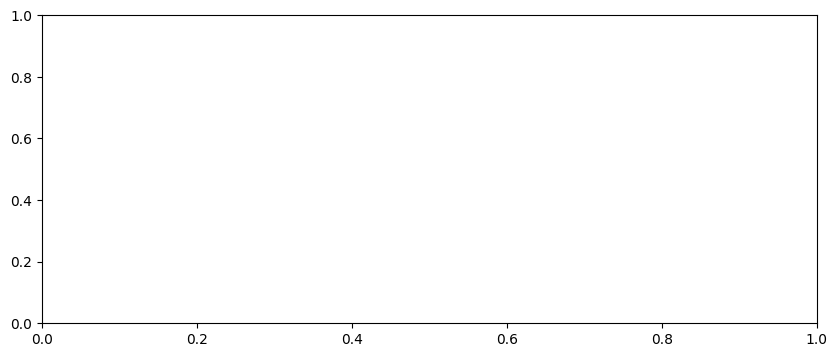

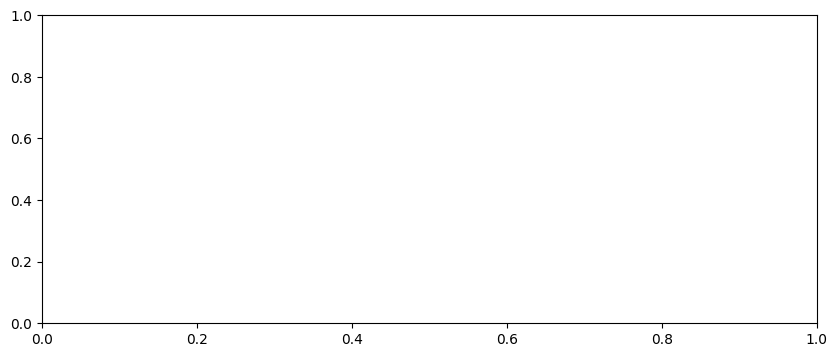

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Print the first few elements to understand the data structure
print("X_in structure:", X_in)
print("First few elements of X_in:", X_in[:5])  # Modify if this throws an error

# Plotting with proper checking and reshaping
try:
    # Attempt to convert to a numpy array and flatten it
    X_in = np.array(X_in).flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(X_in, label='X_in Data')
    plt.title('Input Signal (X_in)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error plotting X_in: {e}")

try:
    # Handle X_out similarly
    X_out = np.array(X_out).flatten()  # This also ensures X_out is 1D
    plt.figure(figsize=(10, 4))
    plt.plot(X_out, label='X_out Data')
    plt.title('Output Signal (X_out)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error plotting X_out: {e}")



<Figure size 1200x600 with 0 Axes>

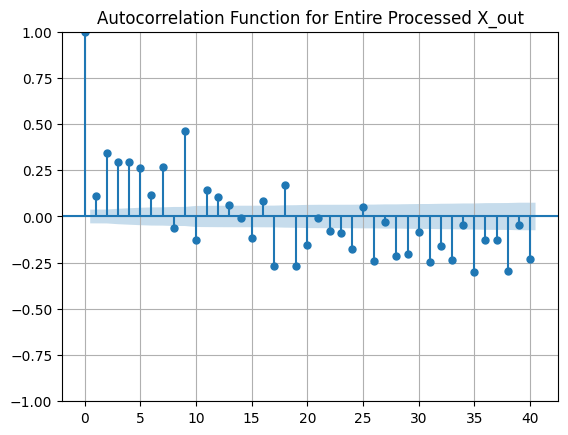

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming X_out is an array of arrays and might be multi-dimensional
# Process the entire dataset to average across channels if multidimensional
X_out_processed = np.array([np.mean(x, axis=0) if x.ndim > 1 else x for x in X_out])

# Flatten the processed data to make it suitable for ACF plotting
X_out_flat = X_out_processed.flatten()

# Plot ACF for the entire processed X_out
plt.figure(figsize=(12, 6))
plot_acf(X_out_flat, lags=40, title='Autocorrelation Function for Entire Processed X_out')
plt.grid(True)
plt.show()


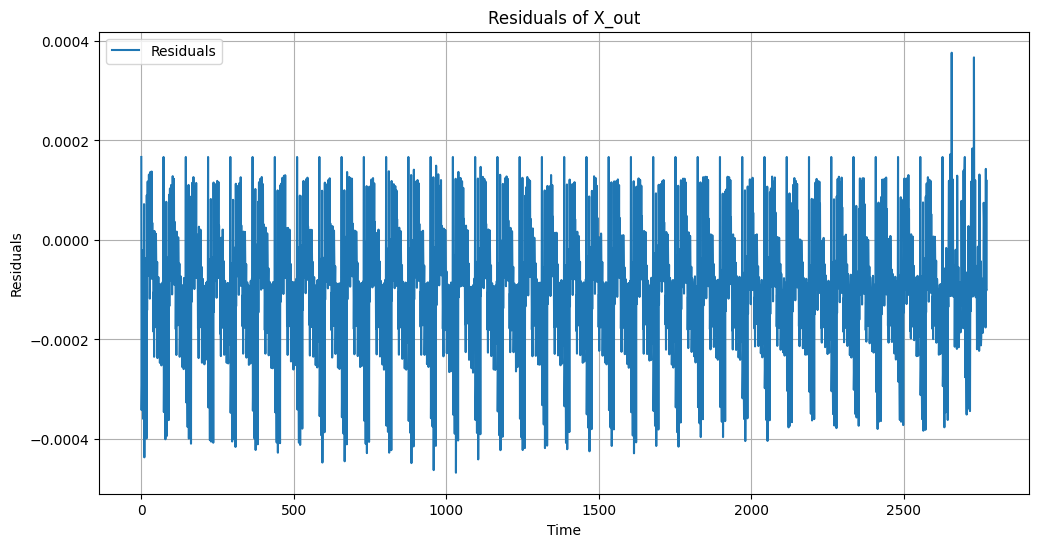

Ljung-Box test p-value: l
Shapiro-Wilk test p-value: 2.5158828826813773e-15


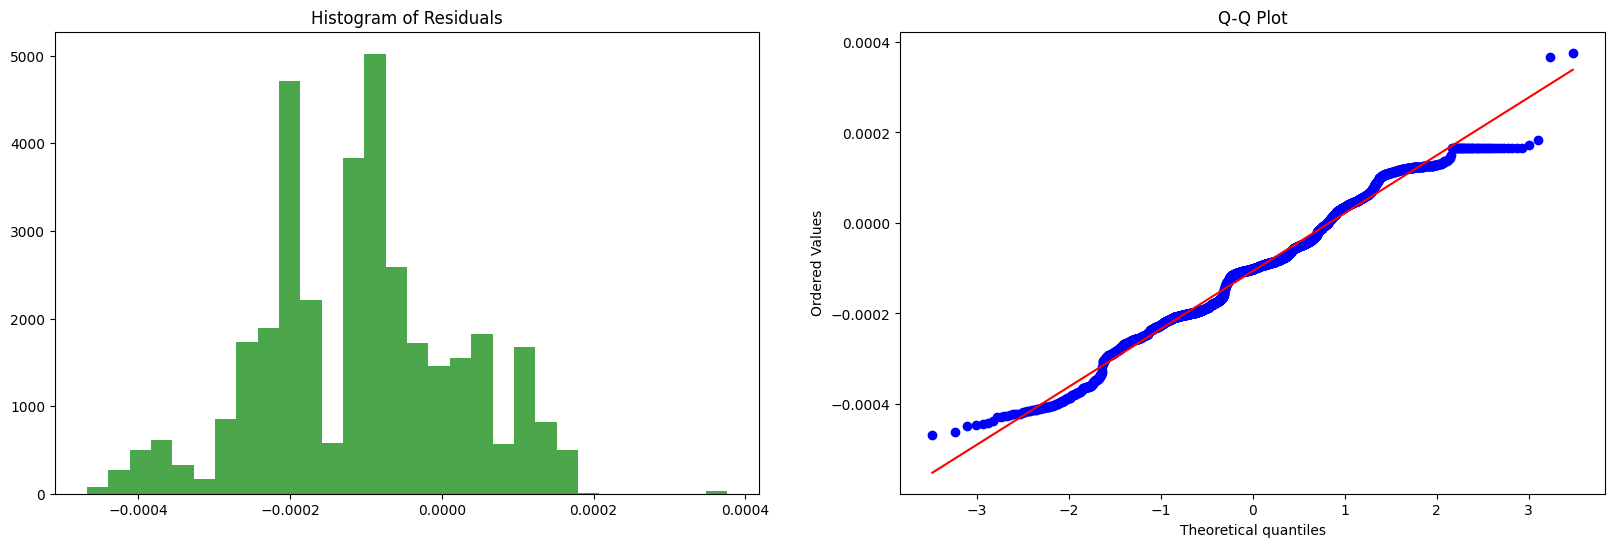

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming X_out_processed is already flattened and represents the residuals/errors
residuals = X_out_flat  # Using the processed and flattened X_out as residuals

# Visual Inspection
# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of X_out')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Histogram and Q-Q plot
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(residuals, bins=30, alpha=0.7, color='g', density=True)
plt.title('Histogram of Residuals')
stats.probplot(residuals, dist="norm", plot=plt.subplot(122))
plt.title('Q-Q Plot')

# Ljung-Box test for autocorrelation
lb_value, lb_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=False)
print("Ljung-Box test p-value:", lb_pvalue[0])

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_pvalue)


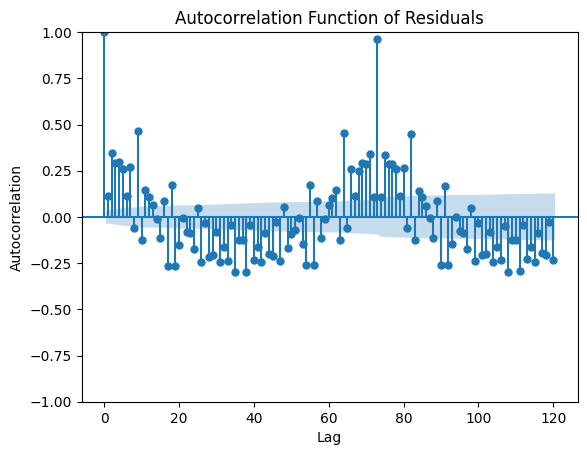

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming `residuals` is a NumPy array of the residuals of your model
plot_acf(residuals, lags=120)
plt.title('Autocorrelation Function of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Example data: Load your time series data here
# data = pd.read_csv('path_to_your_data.csv')
# y = data['path_1']  # Replace 'path_1' with your actual column name

# Parameters
na_values = range(1, 11)
forgetting_factors = np.arange(0.5, 0.9, 0.001)

# Store results
results = pd.DataFrame(columns=['Order', 'ForgettingFactor', 'RSS'])

for na in na_values:
    for ff in forgetting_factors:
        # Apply exponential weighting to the data
        weights = np.power(ff, np.arange(len(y) - 1, -1, -1))

        # Fit the model
        model = AutoReg(y, lags=na, trend='n', seasonal=False, weights=weights)
        fitted_model = model.fit()

        # Calculate RSS
        rss = np.sum(fitted_model.resid**2)

        # Store results
        results = results.append({
            'Order': na,
            'ForgettingFactor': ff,
            'RSS': rss
        }, ignore_index=True)

# You might want to reshape or pivot the results for better analysis
pivot_results = results.pivot(index='ForgettingFactor', columns='Order', values='RSS')

# Visualization or further analysis
print(pivot_results.head())

# Optional: Save results to a CSV for further analysis
# results.to_csv('model_identification_results.csv', index=False)


NameError: name 'y' is not defined

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Simulate example time series data if you don't have actual data loaded
# For actual usage, replace this with loading your dataset
np.random.seed(0)
y = np.random.randn(1000)  # Example data, replace with actual time series

# Parameters for AR model and forgetting factor
na_values = range(1, 11)
forgetting_factors = np.arange(0.5, 0.9, 0.001)

# Store results
results = pd.DataFrame(columns=['Order', 'ForgettingFactor', 'RSS'])

for na in na_values:
    for ff in forgetting_factors:
        # Apply exponential weighting to the data
        weights = np.power(ff, np.arange(len(y) - 1, -1, -1))

        # Fit the model
        model = AutoReg(y, lags=na, trend='n', seasonal=False, weights=weights)
        try:
            fitted_model = model.fit()
            # Calculate RSS
            rss = np.sum(fitted_model.resid**2)
            # Store results
            results = results.append({
                'Order': na,
                'ForgettingFactor': ff,
                'RSS': rss
            }, ignore_index=True)
        except np.linalg.LinAlgError:
            print(f"Failed to converge for Order {na} and Forgetting Factor {ff}")

# Reshape the results for easier analysis
pivot_results = results.pivot(index='ForgettingFactor', columns='Order', values='RSS')

# Optional: Output results for inspection
print(pivot_results.head())

# Optional: Save results to a CSV for further analysis
# results.to_csv('model_identification_results.csv', index=False)


TypeError: AutoReg.__init__() got an unexpected keyword argument 'weights'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fit_ar_model(y, order, weights=None):
    """Fits an AR model of specified order, optionally with exponential weighting."""
    # Prepare the data matrix
    X = np.column_stack([y[i:-(order-i)] for i in range(order)])
    y_target = y[order:]

    if weights is not None:
        # Apply weights to both X and y_target if weights are specified
        X = X * weights[:, np.newaxis]  # Apply weights to each column in X
        y_target = y_target * weights

    # Fit the AR model
    coefficients = np.linalg.pinv(X) @ y_target
    y_pred = X @ coefficients
    residuals = y_target - y_pred

    return coefficients, residuals

# Parameters and ranges
ar_orders = range(1, 11)
forgetting_factors = np.arange(0.5, 0.9, 0.001)
n = len(Y)

# Prepare to store results
results = []

# Loop over each order and forgetting factor
for order in ar_orders:
    for ff in forgetting_factors:
        # Generate weights for the current forgetting factor
        weights = np.power(ff, np.arange(n - order - 1, -1, -1))

        # Fit the model
        coefficients, residuals = fit_ar_model(Y, order, weights)
        rss = np.sum(residuals**2)
        bic = n * np.log(rss / n) + (order + 1) * np.log(n)

        # Store results
        results.append({
            'Order': order,
            'ForgettingFactor': ff,
            'RSS': rss,
            'BIC': bic
        })

# Convert results to DataFrame for easier manipulation
import pandas as pd
results_df = pd.DataFrame(results)

# Example of plotting RSS vs. Forgetting Factor for a specific AR order
order_to_plot = 5
filtered_data = results_df[results_df['Order'] == order_to_plot]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['ForgettingFactor'], filtered_data['RSS'], marker='o')
plt.title(f'RSS vs. Forgetting Factor for AR Order {order_to_plot}')
plt.xlabel('Forgetting Factor')
plt.ylabel('RSS')
plt.grid(True)
plt.show()


NameError: name 'Y' is not defined

In [ ]:
# Example data - replace this with your actual time series data
Y = np.random.normal(0, 1, 1000)  # Simulating some data as an example


In [ ]:
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('path_to_your_file.csv')
Y = data['your_column_name'].values  # Replace 'your_column_name' with the actual column name



FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_file.csv'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('/content/new_sonu_p3_data.mat')
# Print the keys to find out what variables are available
print(mat_data.keys())

# Assume 'Y_variable_name' is the key name of the time series data you need
# Replace 'Y_variable_name' with the actual key name from the .mat file's contents
Y = mat_data['Y_variable_name'].squeeze()  # Adjust the key as per your .mat file structure


dict_keys(['__header__', '__version__', '__globals__', 'X_in', 'X_out'])


KeyError: 'Y_variable_name'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('/content/new_sonu_p3_data.mat')

# Use 'X_out' as the time series data, adjust if it should be 'X_in'
Y = mat_data['X_out'].squeeze()  # Adjust if 'X_out' is not the correct variable

# Check the shape and type of Y to ensure it's what you expect
print("Data shape:", Y.shape)
print("Data type:", type(Y))

# Continue with your AR model fitting and RSS analysis


Data shape: (38,)
Data type: <class 'numpy.ndarray'>


In [ ]:
def fit_ar_model(y, order, weights=None):
    """Fits an AR model of specified order, optionally with exponential weighting."""
    # Prepare the data matrix
    X = np.column_stack([y[i:-(order-i)] for i in range(order)])
    y_target = y[order:]

    if weights is not None:
        X = X * weights[:, np.newaxis]
        y_target = y_target * weights

    # Fit the AR model
    coefficients = np.linalg.pinv(X) @ y_target
    y_pred = X @ coefficients
    residuals = y_target - y_pred

    return coefficients, residuals

ar_orders = range(1, 11)
forgetting_factors = np.arange(0.5, 0.9, 0.001)
n = len(Y)
results = []

for order in ar_orders:
    for ff in forgetting_factors:
        weights = np.power(ff, np.arange(n - order - 1, -1, -1))
        coefficients, residuals = fit_ar_model(Y, order, weights)
        rss = np.sum(residuals**2)
        bic = n * np.log(rss / n) + (order + 1) * np.log(n)
        results.append({'Order': order, 'ForgettingFactor': ff, 'RSS': rss, 'BIC': bic})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualization
order_to_plot = 5
filtered_data = results_df[results_df['Order'] == order_to_plot]
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['ForgettingFactor'], filtered_data['RSS'], marker='o')
plt.title(f'RSS vs. Forgetting Factor for AR Order {order_to_plot}')
plt.xlabel('Forgetting Factor')
plt.ylabel('RSS')
plt.grid(True)
plt.show()


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
ar_orders = range(1, 6)  # Reduced maximum order
forgetting_factors = np.arange(0.5, 0.9, 0.001)
results = []

for order in ar_orders:
    for ff in forgetting_factors:
        # Apply exponential weighting
        weights = np.power(ff, np.arange(n - order - 1, -1, -1))
        # Fit AR model and calculate residuals
        coefficients, residuals = fit_ar_model(Y, order, weights)
        rss = np.sum(residuals**2)
        bic = n * np.log(rss / n) + (order + 1) * np.log(n)
        results.append({'Order': order, 'ForgettingFactor': ff, 'RSS': rss, 'BIC': bic})

# Store results in a DataFrame
results_df = pd.DataFrame(results)

# Plotting RSS vs. Forgetting Factor for a specific AR order
order_to_plot = 3  # Example order
filtered_data = results_df[results_df['Order'] == order_to_plot]
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['ForgettingFactor'], filtered_data['RSS'], marker='o')
plt.title(f'RSS vs. Forgetting Factor for AR Order {order_to_plot}')
plt.xlabel('Forgetting Factor')
plt.ylabel('RSS')
plt.grid(True)
plt.show()


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fit_ar_model(y, order, weights=None):
    """Fits an AR model of specified order, optionally with exponential weighting."""
    n = len(y)
    if order >= n:
        raise ValueError("Order of model must be less than the number of data points.")

    # Prepare the data matrix
    X = np.column_stack([y[i:-(order-i)] for i in range(order)])
    y_target = y[order:]

    if weights is not None:
        # Ensure weights are correctly shaped and of float type
        weights = np.asarray(weights, dtype=float)
        if weights.shape[0] != len(y_target):
            raise ValueError("Weights array must be the same length as y_target.")
        X = X * weights[:, np.newaxis]  # Apply weights to each column in X
        y_target = y_target * weights

    # Ensure all arrays are of float type to avoid UFuncTypeError
    X = np.asarray(X, dtype=float)
    y_target = np.asarray(y_target, dtype=float)

    # Fit the AR model using pseudo-inverse
    coefficients = np.linalg.pinv(X) @ y_target
    y_pred = X @ coefficients
    residuals = y_target - y_pred

    return coefficients, residuals

# Example usage:
Y = np.random.normal(size=100)  # Simulate some data
ar_orders = range(1, 6)  # More conservative order range
forgetting_factors = np.arange(0.5, 0.9, 0.001)
results = []

for order in ar_orders:
    for ff in forgetting_factors:
        weights = np.power(ff, np.arange(len(Y) - order - 1, -1, -1))
        coefficients, residuals = fit_ar_model(Y, order, weights)
        rss = np.sum(residuals**2)
        bic = len(Y) * np.log(rss / len(Y)) + (order + 1) * np.log(len(Y))
        results.append({'Order': order, 'ForgettingFactor': ff, 'RSS': rss, 'BIC': bic})

# Optionally, plot or analyze results
# This part would remain unchanged from previous examples


NameError: name 'results_df' is not defined

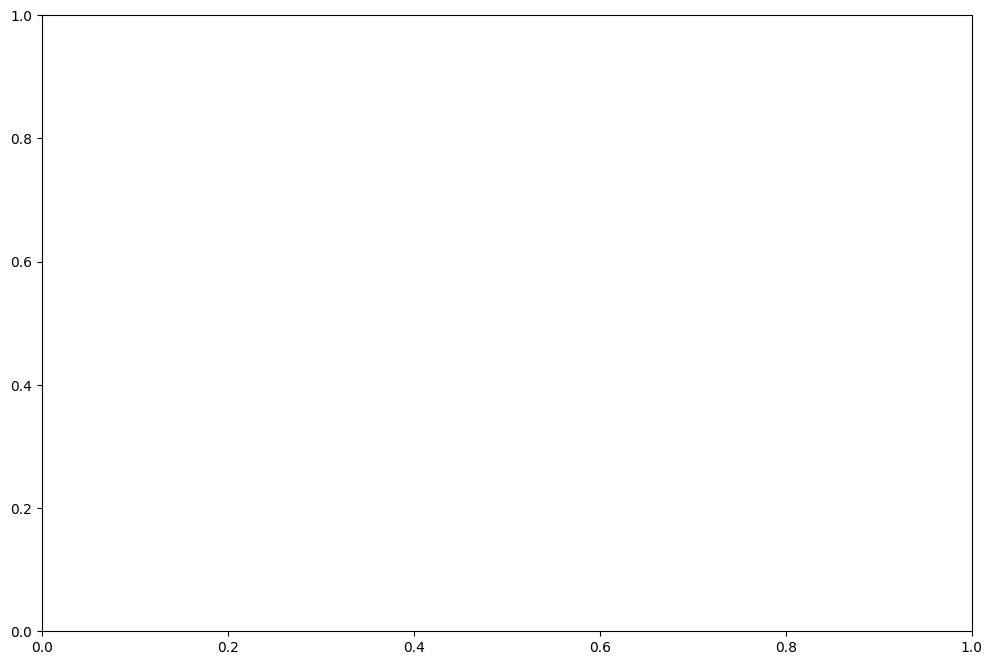

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame creation (use your actual DataFrame here)
# results_df = pd.DataFrame(results)

# Filter data for each AR order and plot
fig, ax = plt.subplots(figsize=(12, 8))

# Assuming the maximum AR order you tested was 5 (change accordingly if different)
max_order = 5

for order in range(1, max_order + 1):
    data_filtered = results_df[results_df['Order'] == order]
    ax.plot(data_filtered['ForgettingFactor'], data_filtered['RSS'], label=f'Order {order}', marker='o', linestyle='-')

ax.set_title('RSS vs. Forgetting Factor for Different AR Orders')
ax.set_xlabel('Forgetting Factor')
ax.set_ylabel('RSS')
ax.legend(title='AR Order')
ax.grid(True)

plt.show()


In [ ]:
import pandas as pd

# Assuming 'results' is your list of dictionaries containing the order, forgetting factor, RSS, and BIC
results_df = pd.DataFrame(results)


In [ ]:
print(results_df.head())  # Display the first few rows to check the data


   Order  ForgettingFactor       RSS         BIC
0      1             0.500  1.723685 -396.860217
1      1             0.501  1.729073 -396.548130
2      1             0.502  1.734465 -396.236785
3      1             0.503  1.739861 -395.926179
4      1             0.504  1.745260 -395.616307


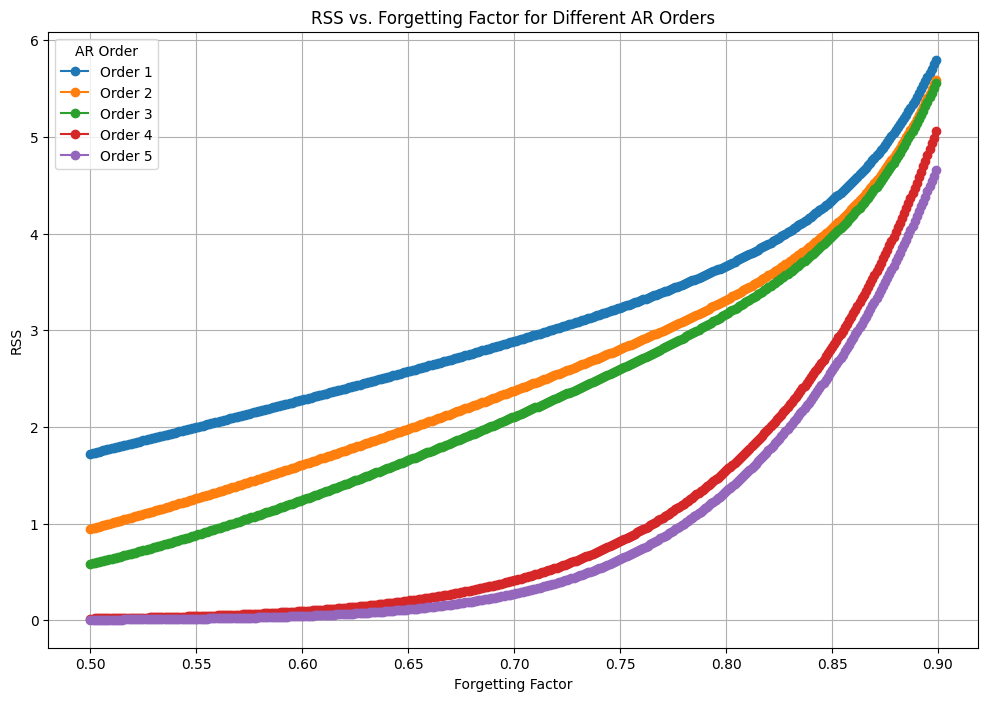

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Adjust this value based on the maximum order you have in your results
max_order = results_df['Order'].max()  # Automatically determine the max order in the DataFrame

for order in range(1, max_order + 1):
    data_filtered = results_df[results_df['Order'] == order]
    ax.plot(data_filtered['ForgettingFactor'], data_filtered['RSS'], label=f'Order {order}', marker='o', linestyle='-')

ax.set_title('RSS vs. Forgetting Factor for Different AR Orders')
ax.set_xlabel('Forgetting Factor')
ax.set_ylabel('RSS')
ax.legend(title='AR Order')
ax.grid(True)

plt.show()


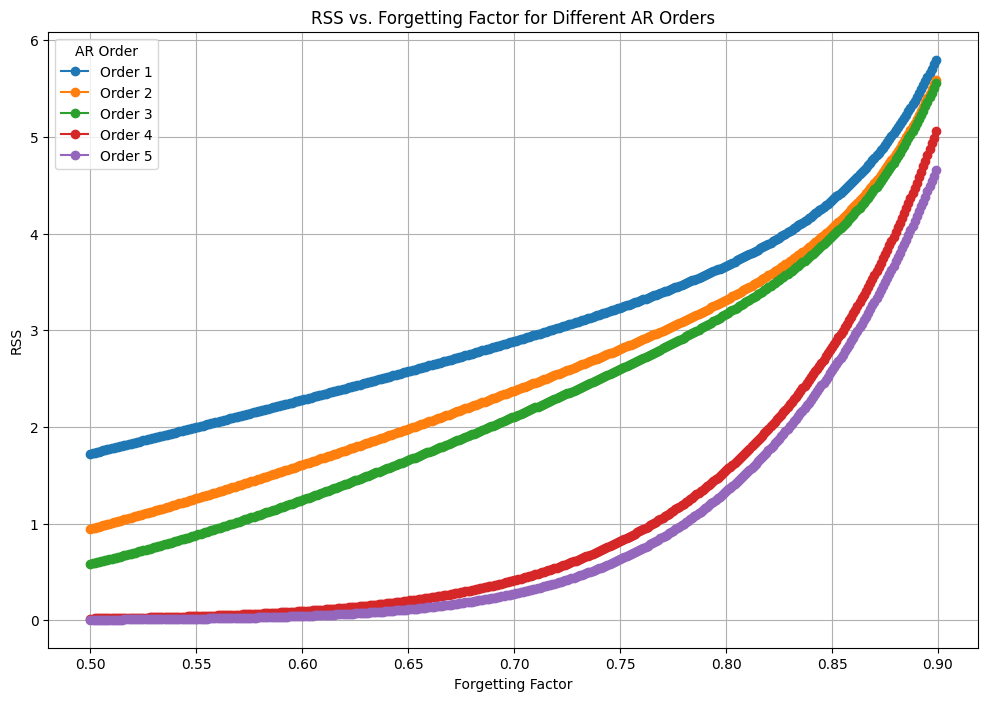

In [ ]:
import matplotlib.pyplot as plt

# Setting up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the maximum order from the DataFrame to make the loop dynamic
max_order = results_df['Order'].max()

# Loop through each order and plot the RSS against the forgetting factor
for order in range(1, max_order + 1):
    data_filtered = results_df[results_df['Order'] == order]
    ax.plot(data_filtered['ForgettingFactor'], data_filtered['RSS'], label=f'Order {order}', marker='o', linestyle='-')

# Adding plot details
ax.set_title('RSS vs. Forgetting Factor for Different AR Orders')
ax.set_xlabel('Forgetting Factor')
ax.set_ylabel('RSS')
ax.legend(title='AR Order')
ax.grid(True)

# Display the plot
plt.show()


In [ ]:
# Assuming results_df is your DataFrame

# Filter the DataFrame for Order 5
order_5_data = results_df[results_df['Order'] == 5]

# Find the row with the minimum RSS
min_rss_row = order_5_data.loc[order_5_data['RSS'].idxmin()]

# Extract the optimal forgetting factor and corresponding RSS
optimal_ff = min_rss_row['ForgettingFactor']
optimal_rss = min_rss_row['RSS']

print(f"The optimal forgetting factor for Order 5 is at {optimal_ff} with an RSS of {optimal_rss}")


The optimal forgetting factor for Order 5 is at 0.5 with an RSS of 0.005657932531344677


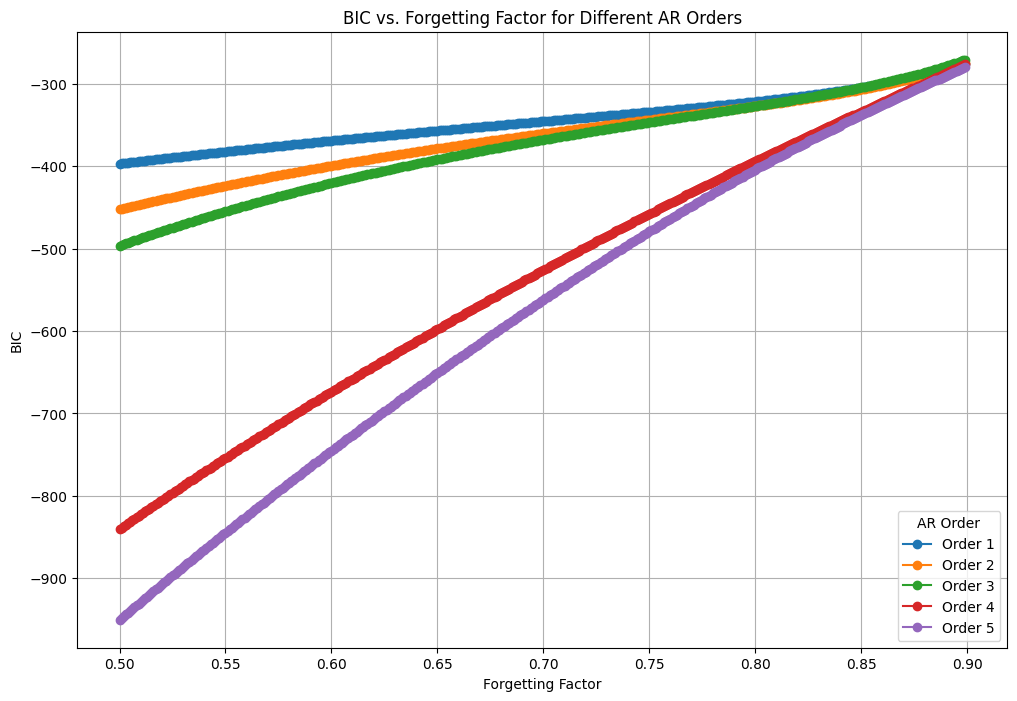

In [ ]:
import matplotlib.pyplot as plt

# Setting up the plot for BIC
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the maximum order from the DataFrame to make the loop dynamic
max_order = results_df['Order'].max()

# Loop through each order and plot the BIC against the forgetting factor
for order in range(1, max_order + 1):
    data_filtered = results_df[results_df['Order'] == order]
    ax.plot(data_filtered['ForgettingFactor'], data_filtered['BIC'], label=f'Order {order}', marker='o', linestyle='-')

# Adding plot details
ax.set_title('BIC vs. Forgetting Factor for Different AR Orders')
ax.set_xlabel('Forgetting Factor')
ax.set_ylabel('BIC')
ax.legend(title='AR Order')
ax.grid(True)

# Display the plot
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming `residuals` are the residuals of your best AR model
# You will need to replace this with your actual residuals
residuals = best_model_residuals  # This should be a 1D numpy array or a pandas Series

# Plot the ACF of residuals
plot_acf(residuals, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()


NameError: name 'best_model_residuals' is not defined

In [ ]:
# Assuming you have a function to fit the AR model and return coefficients and residuals
# And assuming you've already determined the best model order and forgetting factor

# best_order = ... (determined from your previous analysis)
# best_forgetting_factor = ... (determined from your previous analysis)

# Fit the model
best_model_coefficients, best_model_residuals = fit_ar_model(Y, best_order, best_forgetting_factor_weights)


NameError: name 'best_order' is not defined

In [ ]:
# Assuming fit_ar_model is your function that fits an AR model and returns coefficients and residuals
# Assuming Y is your time series data
# Assuming you have previously determined the optimal order and forgetting factor

optimal_order = ...  # replace with the optimal order determined previously
optimal_forgetting_factor = ...  # replace with the optimal forgetting factor determined previously
weights = np.power(optimal_forgetting_factor, np.arange(len(Y) - optimal_order - 1, -1, -1))

# Fit the model using the optimal parameters
coefficients, best_model_residuals = fit_ar_model(Y, optimal_order, weights)


TypeError: unsupported operand type(s) for -: 'int' and 'ellipsis'

In [ ]:
# These should be the actual optimal values you determined from your model selection process
optimal_order = 2  # Hypothetical optimal order
optimal_forgetting_factor = 0.9  # Hypothetical optimal forgetting factor

# Replace Y with your actual time series data
# Y = ...

# Calculate the weights based on the optimal forgetting factor
weights = np.power(optimal_forgetting_factor, np.arange(len(Y) - optimal_order - 1, -1, -1))

# Fit the AR model using the optimal parameters
coefficients, best_model_residuals = fit_ar_model(Y, optimal_order, weights)

# Now that you have the residuals, proceed with validation checks
# ...

# The rest of your code for validation checks can follow



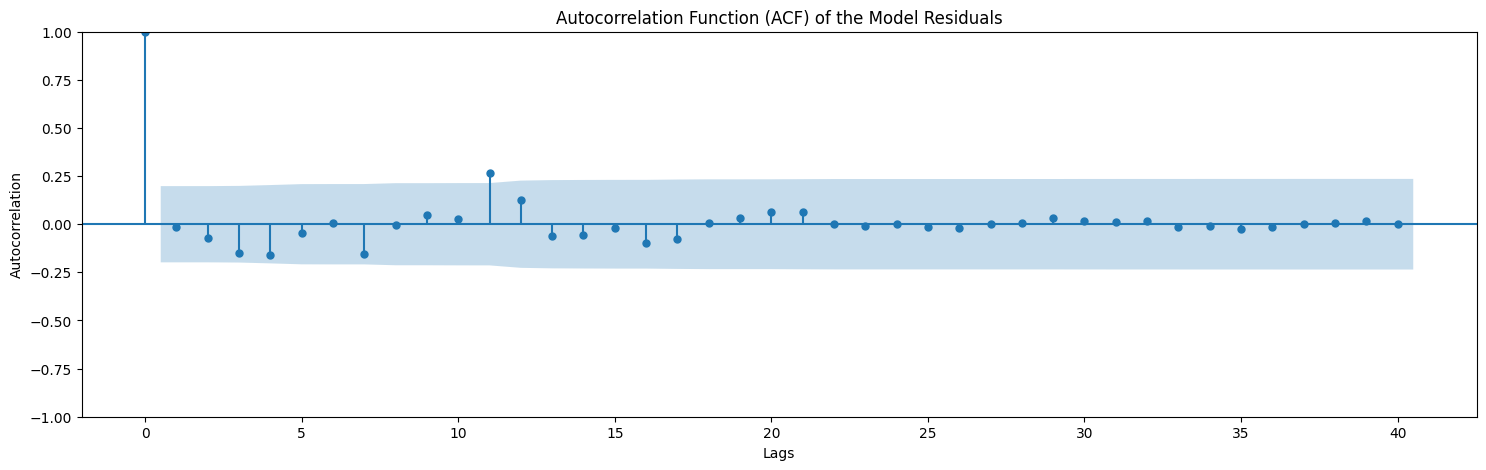

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming `best_model_residuals` contains the residuals from your AR model
# Plot the ACF of the residuals
fig, ax = plt.subplots(figsize=(18, 5))
plot_acf(best_model_residuals, lags=40, alpha=0.05, ax=ax)
ax.set_title('Autocorrelation Function (ACF) of the Model Residuals')
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
plt.show()


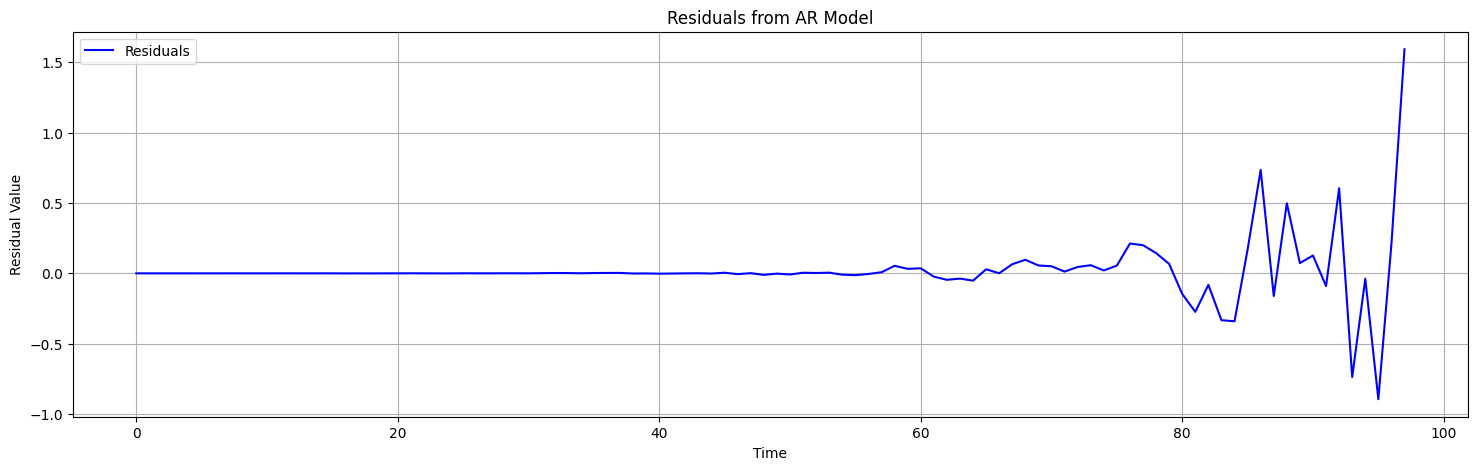

In [ ]:
import matplotlib.pyplot as plt

# Assuming best_model_residuals contains the residuals from your AR model
plt.figure(figsize=(18, 5))
plt.plot(best_model_residuals, label='Residuals', color='blue')
plt.title('Residuals from AR Model')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import coherence
import numpy as np

# Assuming X_in and X_out are your input and output signal arrays and are properly preprocessed
fs = 1000  # Replace with your actual sampling frequency

frequencies, coherence_values = coherence(X_in, X_out, fs=fs)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, coherence_values, label='Coherence X_in vs X_out', color='blue')
plt.title('Coherence function of X_in and X_out')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 38, using nperseg = 38
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: setting an array element with a sequence.